# **PROYECTO DE CURSO – FASE 1**
 
### **Catedrático:** Ing. Pren Biba - Statistical Learning I 
### **Auxiliar:** Inga. Alejandra Ubico Fecha: Mayo 2024

##### **Jose Guillermo Gordillo Lopez -  23003971**
##### **Marvin Fernando Carrillo Robles - 14003303**	 

In [2]:
#Librerias necesarias para trabajar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

    Carga del Dataset

In [3]:
dataPro = pd.read_csv("SRC/DATA/water-quality-2.csv")
dataPro.head()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,Lab Qualifier,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,...,NaN,0.002,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN


# 3. Selección de Variables

##### 3.1 Variables Categoricas

In [4]:
categoricas = [col for col in dataPro.columns if(dataPro[col].dtypes == 'object')]
categoricas

['Sample Number',
 'Collect DateTime',
 'Site Type',
 'Area',
 'Locator',
 'Site',
 'Parameter',
 'Units',
 'Lab Qualifier',
 'Text Value',
 'Sample Info',
 'Steward Note',
 'Method',
 'Date Analyzed']

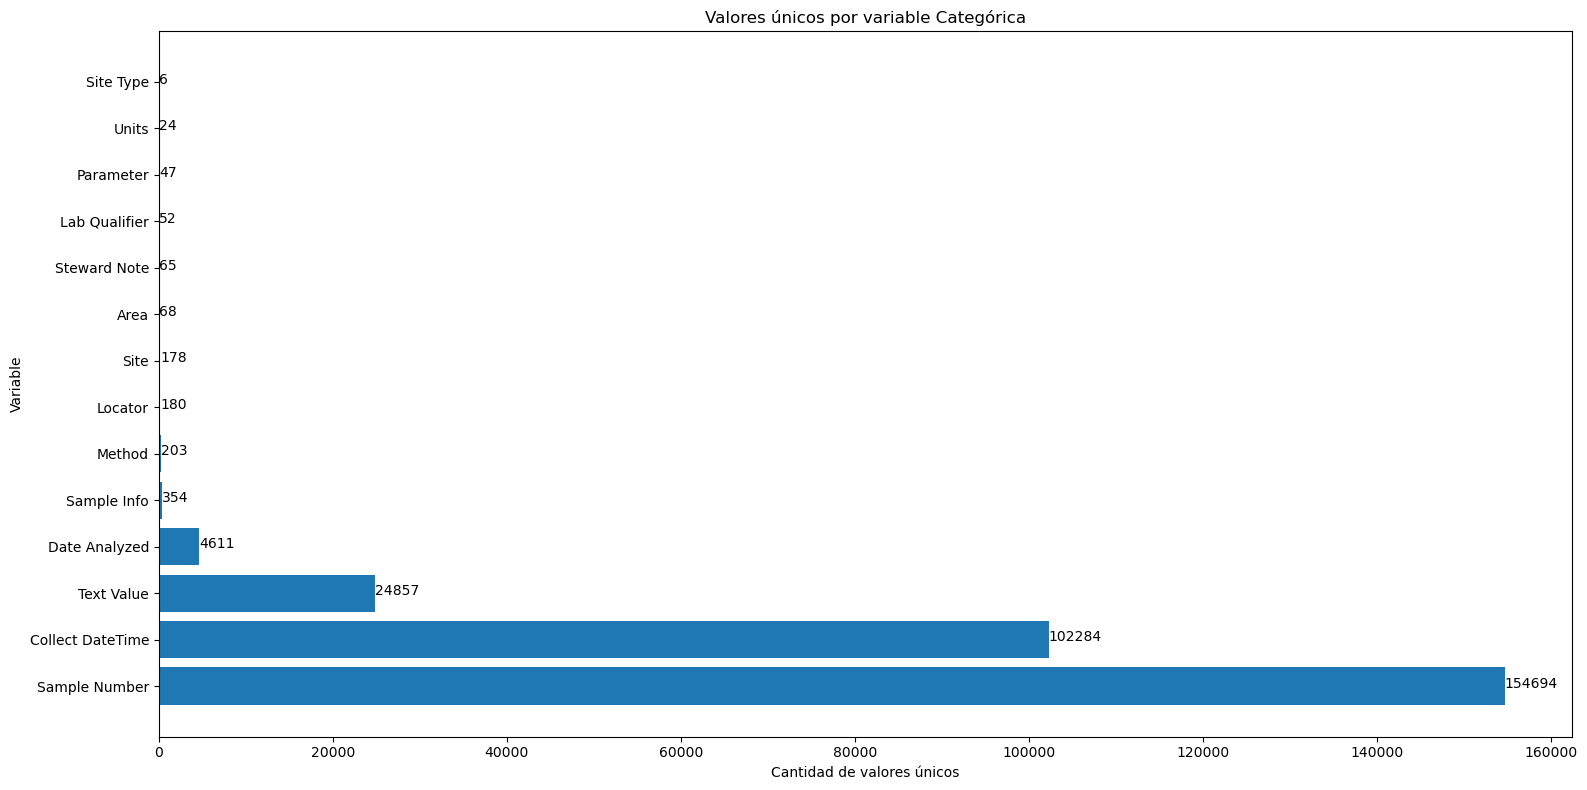

In [5]:

results = []


for col in categoricas:
   
    unique_values = len(dataPro[col].unique())
    
     
    results.append({'Column': col, 'Unique Values': unique_values})

 
results_df = pd.DataFrame(results)

 
results_df = results_df.sort_values(by='Unique Values', ascending=False)

 
plt.figure(figsize=(16, 8))
plt.barh(range(len(results_df)), results_df['Unique Values'], align='center')
plt.yticks(range(len(results_df)), results_df['Column'])
plt.title('Valores únicos por variable Categórica')
plt.xlabel('Cantidad de valores únicos')
plt.ylabel('Variable')

 
  
for i, (col, unique_values) in enumerate(zip(results_df['Column'], results_df['Unique Values'])):
    plt.text(unique_values, i + 0.2, str(unique_values), ha='left', va='top')

plt.tight_layout()
plt.show()

##### 3.2 Variables Continuas

In [6]:
continuas = [col for col in dataPro.columns if((dataPro[col].dtypes in ['int64', 'float64']) and len(dataPro[col].unique()) > 30)]
continuas

['Sample ID',
 'Grab ID',
 'Profile ID',
 'Depth (m)',
 'Value',
 'MDL',
 'RDL',
 'Replicates',
 'Replicate Of']

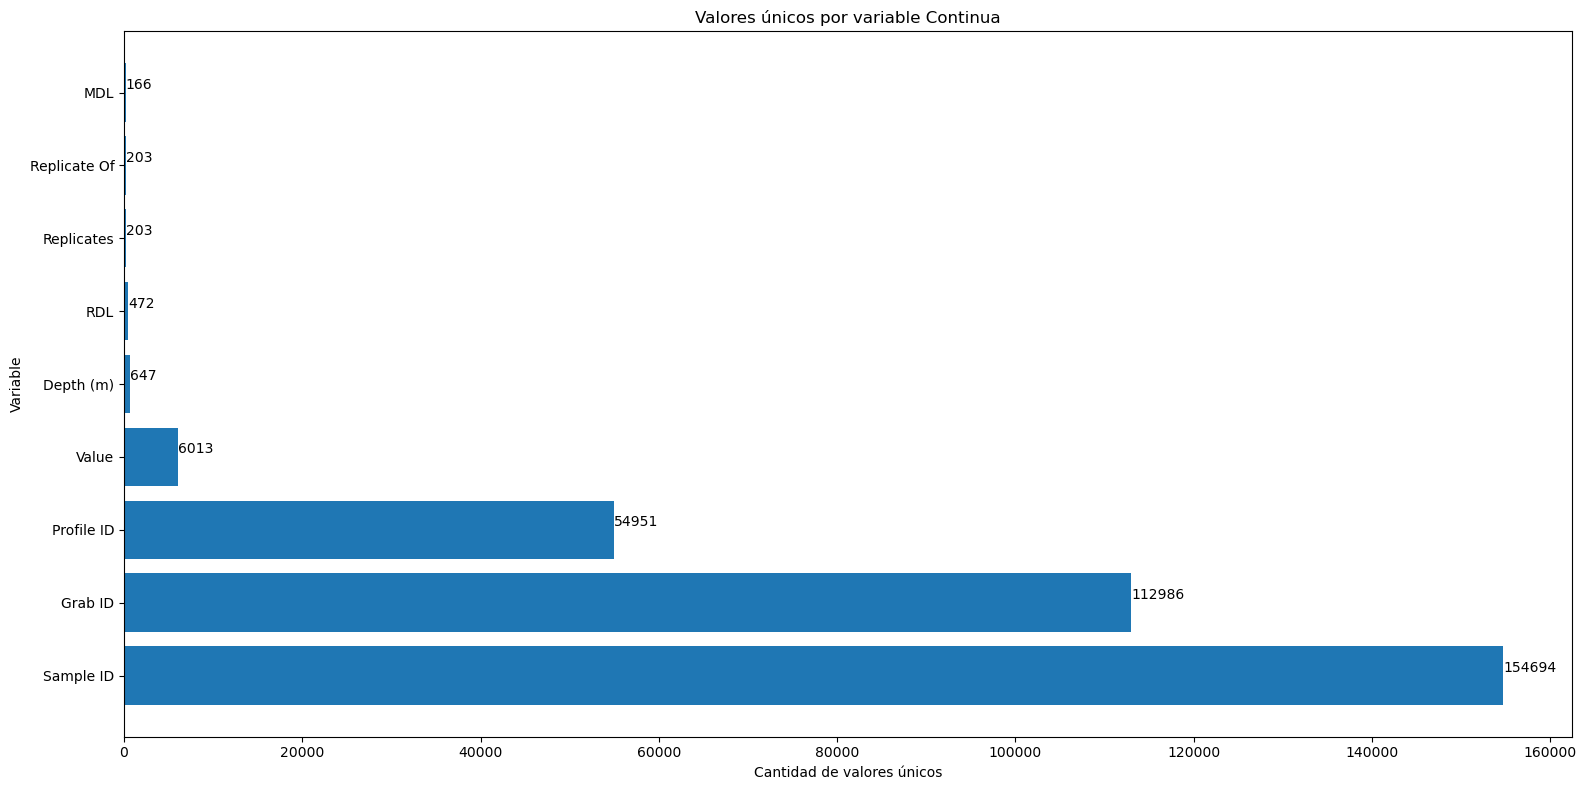

In [7]:

results = []


for col in continuas:
   
    unique_values = len(dataPro[col].unique())
    
     
    results.append({'Column': col, 'Unique Values': unique_values})

 
results_df = pd.DataFrame(results)

 
results_df = results_df.sort_values(by='Unique Values', ascending=False)

 
plt.figure(figsize=(16, 8))
plt.barh(range(len(results_df)), results_df['Unique Values'], align='center')
plt.yticks(range(len(results_df)), results_df['Column'])
plt.title('Valores únicos por variable Continua')
plt.xlabel('Cantidad de valores únicos')
plt.ylabel('Variable')

 
  
for i, (col, unique_values) in enumerate(zip(results_df['Column'], results_df['Unique Values'])):
    plt.text(unique_values, i + 0.2, str(unique_values), ha='left', va='top')

plt.tight_layout()
plt.show()

##### 3.3 Variables Discretas

In [8]:
discretas = [col for col in dataPro.columns if((dataPro[col].dtypes in ['int64', 'float64']) and len(dataPro[col].unique()) <= 30)]
discretas

['QualityId']

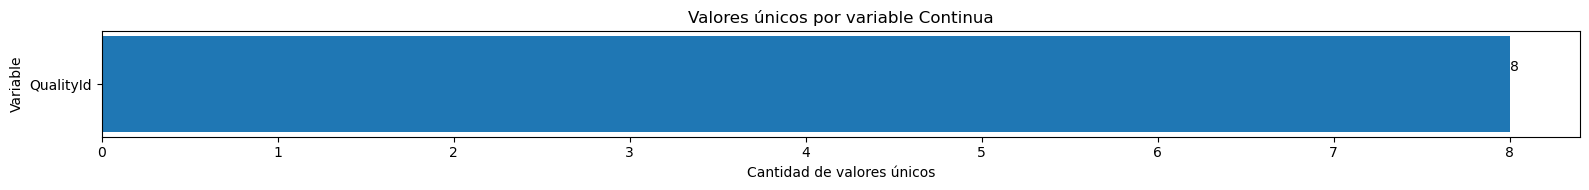

In [9]:

results = []


for col in discretas:
   
    unique_values = len(dataPro[col].unique())
    
     
    results.append({'Column': col, 'Unique Values': unique_values})

 
results_df = pd.DataFrame(results)

 
results_df = results_df.sort_values(by='Unique Values', ascending=False)

 
plt.figure(figsize=(16, 2))
plt.barh(range(len(results_df)), results_df['Unique Values'], align='center')
plt.yticks(range(len(results_df)), results_df['Column'])
plt.title('Valores únicos por variable Continua')
plt.xlabel('Cantidad de valores únicos')
plt.ylabel('Variable')

 
  
for i, (col, unique_values) in enumerate(zip(results_df['Column'], results_df['Unique Values'])):
    plt.text(unique_values, i + 0.2, str(unique_values), ha='left', va='top')

plt.tight_layout()
plt.show()

## 3.4 Variables Predictoras

    Se ha determinado que la variables predictoras pueden ser: SITE o LOCATOR, esto debido a que las ubicaciones pueden ser determinantes para la calidad del Agua

# 4. Ingeniería de características

#### 4.1 Imputación de Datos Faltantes

     Verificamos porcentaje de faltantes por columna


In [10]:
dataPro.isnull().mean()

Sample ID           0.000000
Grab ID             0.299162
Profile ID          0.000000
Sample Number       0.000000
Collect DateTime    0.000000
Depth (m)           0.299162
Site Type           0.000000
Area                0.000106
Locator             0.000000
Site                0.000000
Parameter           0.000000
Value               0.086614
Units               0.000619
QualityId           0.000000
Lab Qualifier       0.881398
MDL                 0.517459
RDL                 0.518719
Text Value          0.818418
Sample Info         0.997504
Steward Note        0.999460
Replicates          0.998697
Replicate Of        0.998784
Method              0.151209
Date Analyzed       0.549180
dtype: float64

    Para tener un mejor panorama de la composición del Dataset, se diseño un gráfico, el cual permite tener una mayor visibilidad de la data; específicamente para identitificar NULOS

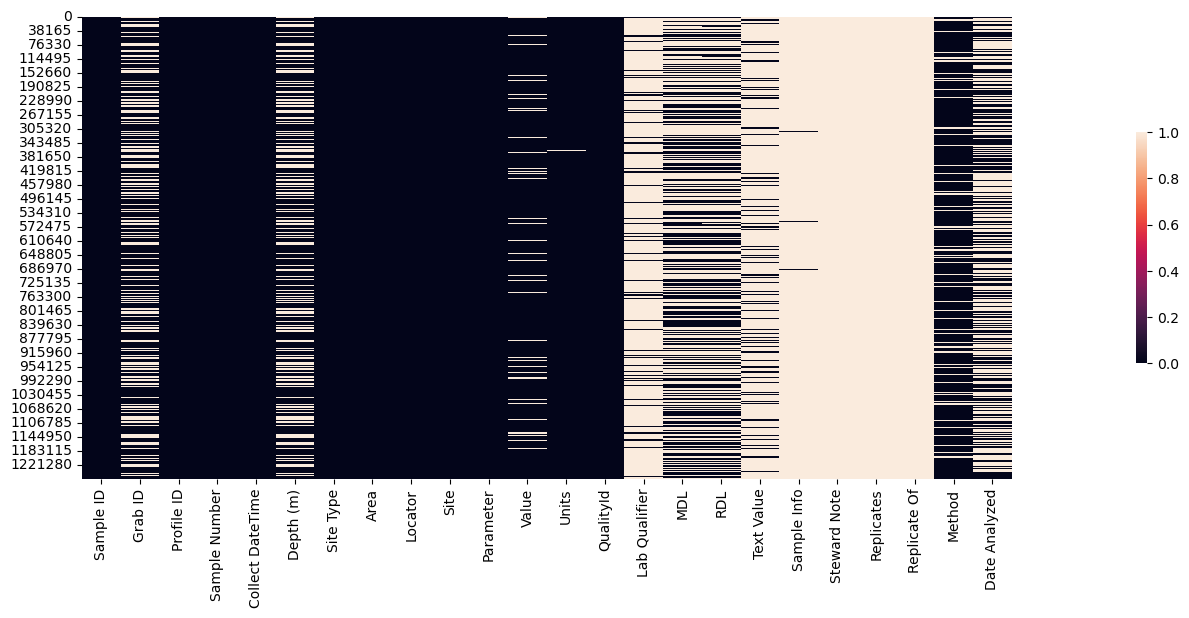

In [11]:

missing_val = dataPro.isna()
missing_val_sum = missing_val.sum()
missing_val_sum


plt.figure(figsize=(16, 6))   
sns.heatmap(missing_val, cbar_kws={'shrink': 0.5, 'pad': 0.1})


plt.show()

    Gráfico de Barras * Nulos

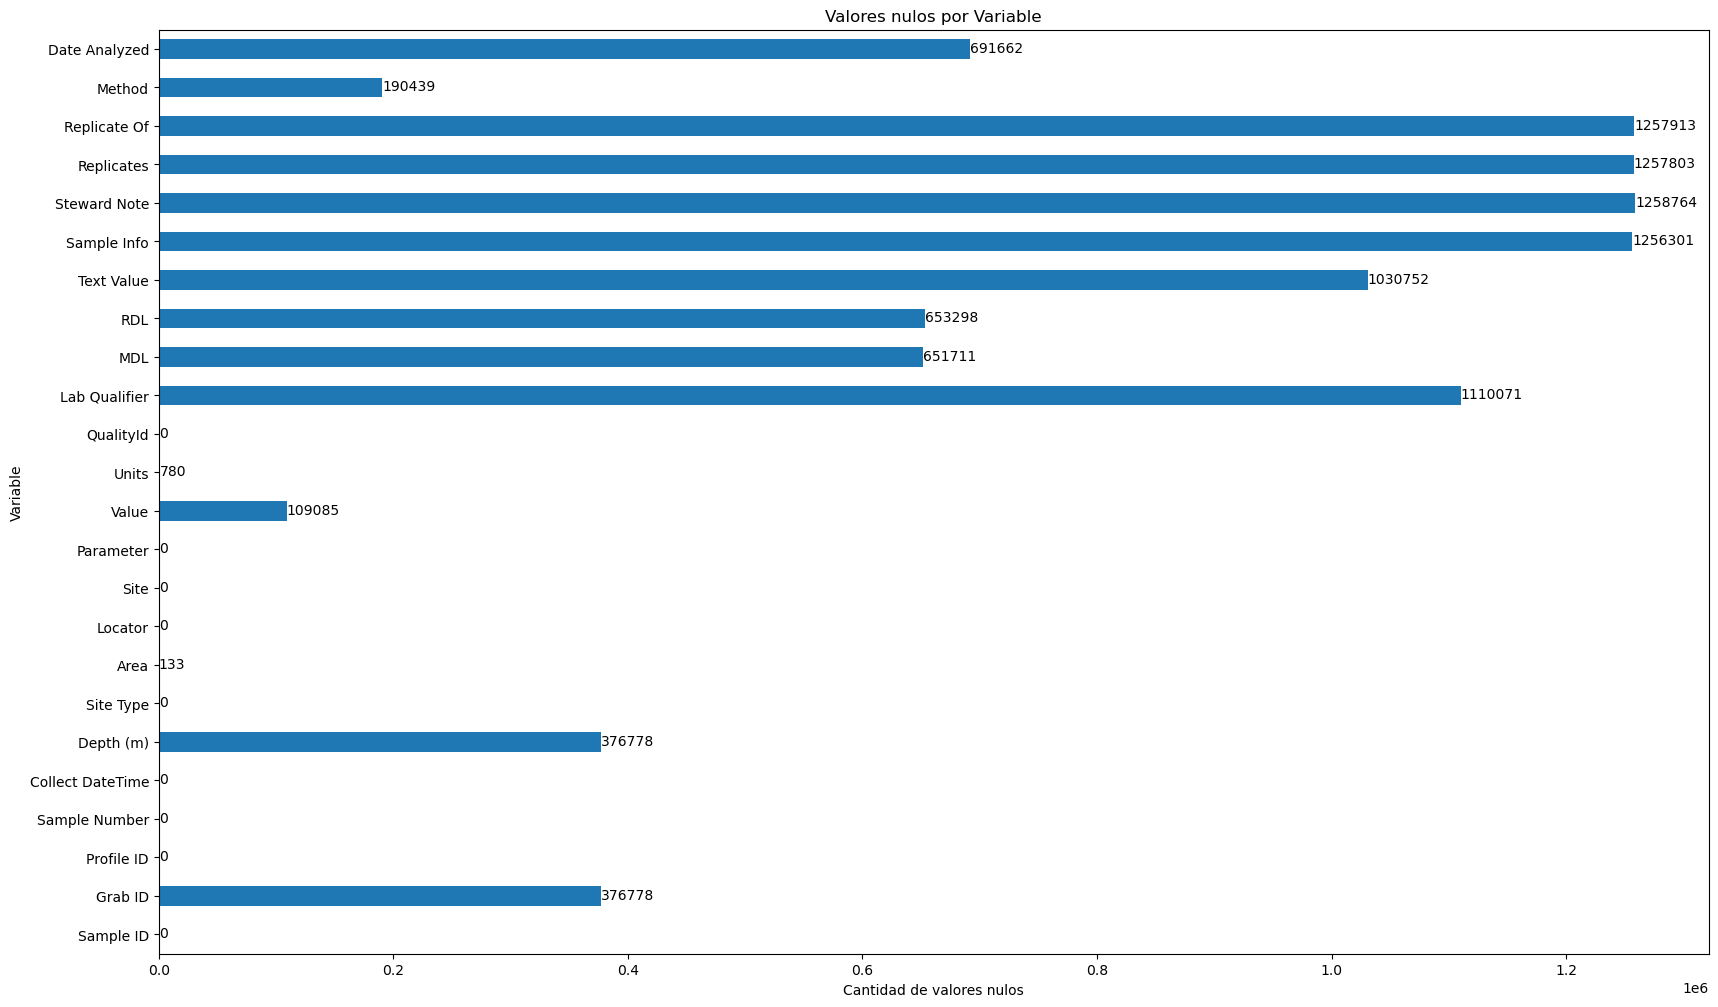

In [12]:

null_counts = dataPro.isnull().sum()


plt.figure(figsize=(20, 12))
null_counts.plot(kind='barh')


for i, value in enumerate(null_counts):
    plt.text(value, i + 0.2, str(value), ha='left', va='top')
    


plt.xlabel('Cantidad de valores nulos')
plt.ylabel('Variable')
plt.title('Valores nulos por Variable')


plt.show()

    Se pueden ver que hay varias columnas que tienen datos faltantes por lo que se procede al analisis por tipo, clasificando las variables categóricas, continuas y discretas

##### 4.1.2 Imputación de variables numéricas continuas:

<Axes: >

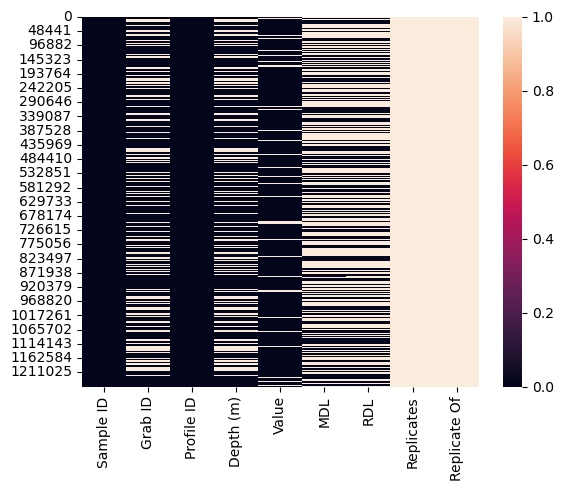

In [13]:
missing_val = dataPro[(continuas)].isna()
missing_val_sum = missing_val.sum()
missing_val_sum

sns.heatmap(missing_val)

    Dado que algunas variables tiene un porcentaje de NAN's mas grande del 5% será necesario realizar un anális particular para cada caso

In [14]:
continuas_con_na = [col for col in continuas if dataPro[col].isnull().mean() > 0]
dataPro[continuas_con_na].isnull().mean() 

Grab ID         0.299162
Depth (m)       0.299162
Value           0.086614
MDL             0.517459
RDL             0.518719
Replicates      0.998697
Replicate Of    0.998784
dtype: float64

    Sin embargo, dado que varias de las variables tiene un porcentaje muy alto de faltantes casi MAYOR DE 50%, se ha decidido eliminar la variable/columna completa dado que cualquier valor que se decida imputar, generará una deformación grande en la estructura de la distribuación.

In [15]:
continuas_con_na = [col for col in continuas_con_na if dataPro[col].isnull().mean() > 0.5]
dataPro[continuas_con_na].isnull().mean() 

MDL             0.517459
RDL             0.518719
Replicates      0.998697
Replicate Of    0.998784
dtype: float64

In [16]:
dataPro.drop(continuas_con_na, axis=1, inplace=True)

In [17]:
continuas = [col for col in dataPro.columns if((dataPro[col].dtypes in ['int64', 'float64']) and len(dataPro[col].unique()) > 30)]
dataPro[continuas].isnull().mean() 

Sample ID     0.000000
Grab ID       0.299162
Profile ID    0.000000
Depth (m)     0.299162
Value         0.086614
dtype: float64

In [18]:
continuas_con_na = [col for col in continuas if dataPro[col].isnull().mean() > 0]
dataPro[continuas_con_na].isnull().mean() 

Grab ID      0.299162
Depth (m)    0.299162
Value        0.086614
dtype: float64

    Dado que todas las variables tiene un porcentaje de NAN's mas grande del 5% será necesario realizar un anális particular para cada caso

##### 4.1.2.1 Análisis para Variable Grab ID

    4.1.2.1.1 Imputación por Media y Mediana

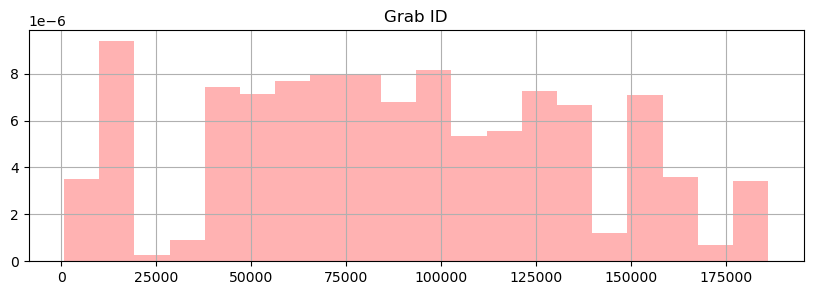

In [19]:
fig = plt.figure(figsize=(10, 3))
dataPro['Grab ID'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Grab ID')
plt.show()

    En esta caso, revisaremos el impacto de la media y mediana al momento al realizar la imputación

Media

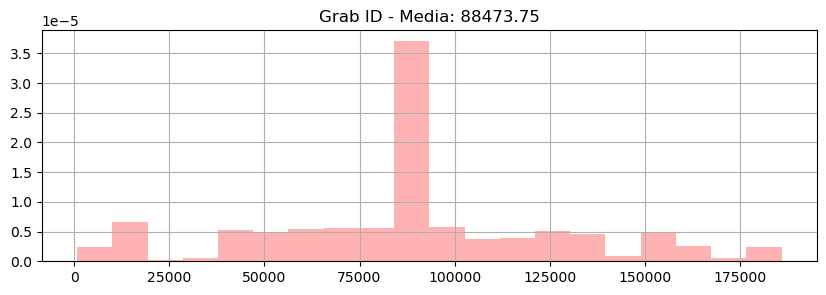

In [20]:
mean_GrabID = round(dataPro['Grab ID'].mean(), 2)

temp_series = dataPro['Grab ID'].fillna(mean_GrabID)

fig = plt.figure(figsize=(10, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Grab ID - Media: ' + str(mean_GrabID))
plt.show()

Mediana

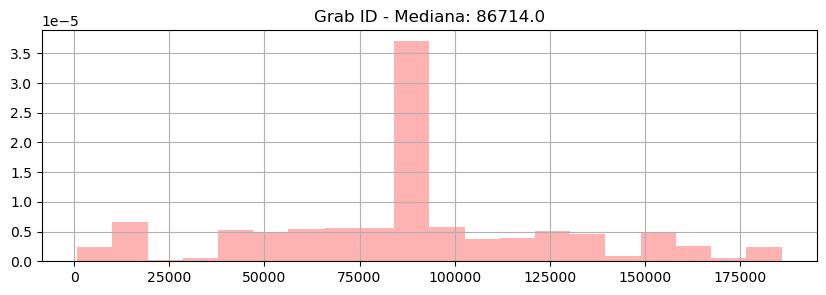

In [21]:
median_GrabID = round(dataPro['Grab ID'].median(), 2)

temp_series = dataPro['Grab ID'].fillna(median_GrabID)

fig = plt.figure(figsize=(10, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Grab ID - Mediana: ' + str(median_GrabID))
plt.show()

    Imputacion:

Como al final la mediana y la media es igual, se imputo por medio de la mediana

In [22]:
dataPro['Grab ID'].fillna(mean_GrabID, inplace=True)

##### 4.1.2.2 Análisis para Variable Depth (m)

    4.1.2.2.1 Imputación por Media y Mediana

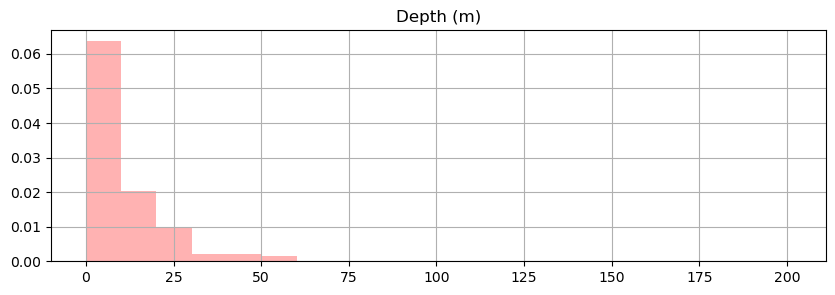

In [23]:
fig = plt.figure(figsize=(10, 3))
dataPro['Depth (m)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Depth (m)')
plt.show()

    En esta caso, revisaremos el impacto de la media y mediana al momento al realizar la imputación

Media

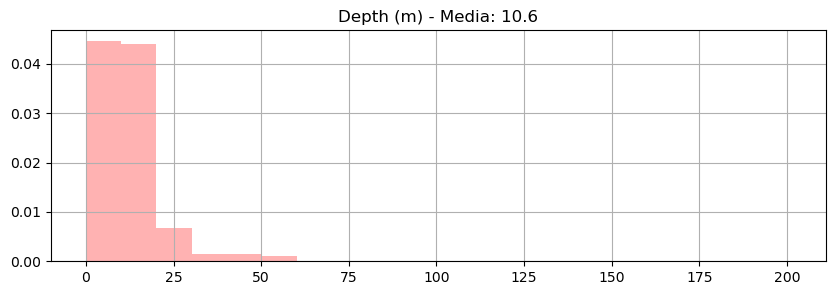

In [24]:
mean_Depth = round(dataPro['Depth (m)'].mean(), 2)

temp_series = dataPro['Depth (m)'].fillna(mean_Depth)

fig = plt.figure(figsize=(10, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Depth (m) - Media: ' + str(mean_Depth))
plt.show()

Mediana

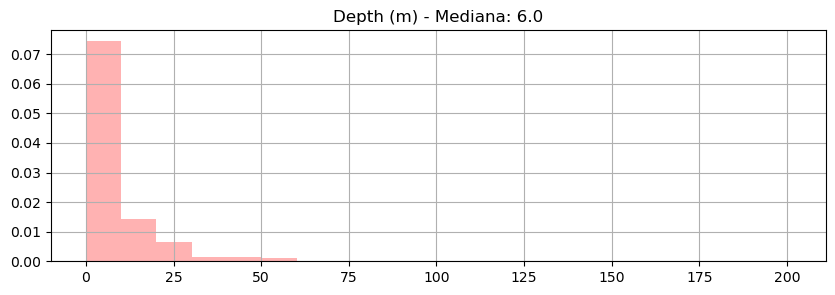

In [25]:
median_Depth = round(dataPro['Depth (m)'].median(), 2)

temp_series = dataPro['Depth (m)'].fillna(median_Depth)

fig = plt.figure(figsize=(10, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Depth (m) - Mediana: ' + str(median_Depth))
plt.show()

Se imputa por medio de la mediana, porque sigue manteniendo la proporcion inicial y hace un leve ajuste hacia la derecha.

    Imputacion:

In [26]:
dataPro['Depth (m)'].fillna(median_Depth, inplace=True)

##### 4.1.2.3 Análisis para Variable Value

    Se realiza un conteo para identificar los valores nulos

In [27]:
dataPro['Value'].isnull().value_counts()
 

Value
False    1150359
True      109085
Name: count, dtype: int64

    4.1.2.3.1 Imputación por Media y Mediana

    En esta caso, revisaremos el impacto de la media y mediana al momento al realizar la imputación

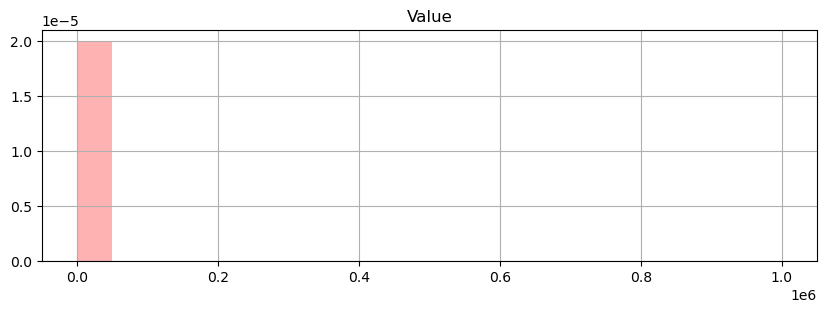

In [28]:
fig = plt.figure(figsize=(10, 3))
dataPro['Value'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Value')
plt.show()

    En esta caso, revisaremos el impacto de la media y mediana al momento al realizar la imputación. Sin embargo por el sesgo que presenta la variable es muy probable que cualquier de los enfoques seleccionados genere un impacto mínimo en la estructura de la distribución.

Media

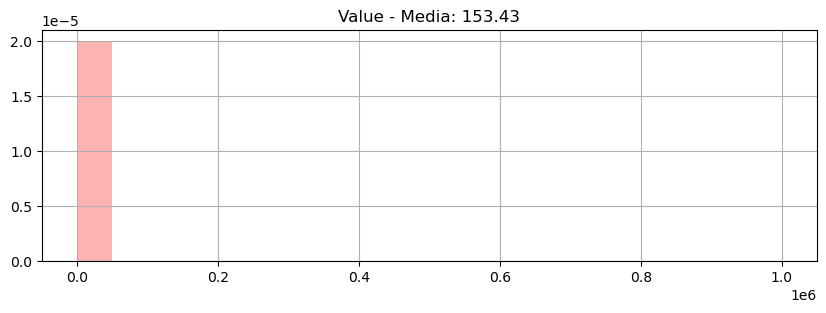

In [29]:
mean_value = round(dataPro['Value'].mean(), 2)

temp_series = dataPro['Value'].fillna(mean_value)

fig = plt.figure(figsize=(10, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Value - Media: ' + str(mean_value))
plt.show()

Mediana

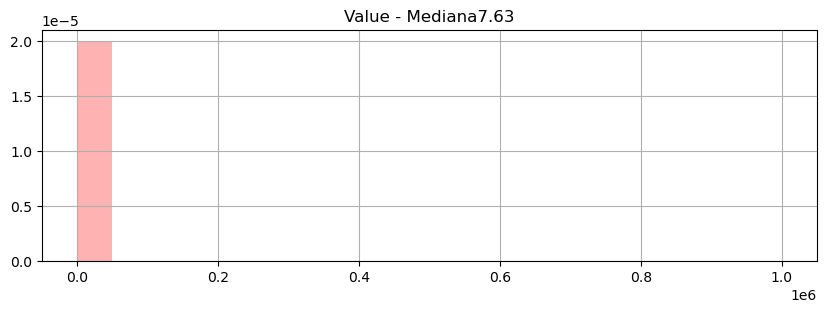

In [30]:
median_value = round(dataPro['Value'].median(), 2)

temp_series = dataPro['Value'].fillna(median_value)

fig = plt.figure(figsize=(10, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Value - Mediana' + str(median_value))
plt.show()

Como lo habíamos comentado anteriormente, el sesgo de la variable es tal que al imputar la media el valor resultanto impacta mínimamente la estructura de la variable por lo que se realizará la imputación por media.

    Imputación:

In [31]:
dataPro['Value'].fillna(mean_value, inplace=True)

##### 4.1.3 Imputación de variables numéricas discretas

    Detectamos el porcentaje de faltantes en la variables numéricas discretas y seleccinamos aquellas variables que tiene valores faltantes

In [32]:
dataPro[discretas].isnull().mean() 

QualityId    0.0
dtype: float64

Como se puede observar no hay valores nulos en la unica variable discreta, por lo que no se hace la imputacion

##### 4.1.4 Imputación de variables categóricas

    Detectamos el porcentaje de faltantes en la variables categóricas y seleccinamos aquellas variables que tiene valores faltantes

In [33]:
categoricas_con_na = [col for col in categoricas if dataPro[col].isnull().mean() > 0]
dataPro[categoricas_con_na].isnull().mean() 

Area             0.000106
Units            0.000619
Lab Qualifier    0.881398
Text Value       0.818418
Sample Info      0.997504
Steward Note     0.999460
Method           0.151209
Date Analyzed    0.549180
dtype: float64

Procedemos a seleccionar aquellas variables que tienen mas del 20% de valores nulos, y se puede observar que la mayoria tienen mas del 50%, por lo que al ser demasiados al imputarlas pueden afectar el modelo


In [34]:
categoricas_con_na_eliminar = [col for col in categoricas if dataPro[col].isnull().mean() > 0.2]
dataPro[categoricas_con_na_eliminar].isnull().mean() 

Lab Qualifier    0.881398
Text Value       0.818418
Sample Info      0.997504
Steward Note     0.999460
Date Analyzed    0.549180
dtype: float64

In [35]:
dataPro.drop(categoricas_con_na_eliminar, axis=1, inplace=True)

In [36]:
categoricas = [col for col in dataPro.columns if(dataPro[col].dtypes == 'object')]
categoricas

['Sample Number',
 'Collect DateTime',
 'Site Type',
 'Area',
 'Locator',
 'Site',
 'Parameter',
 'Units',
 'Method']

In [37]:
categoricas_con_na = [col for col in categoricas if dataPro[col].isnull().mean() > 0]
dataPro[categoricas_con_na].isnull().mean() 

Area      0.000106
Units     0.000619
Method    0.151209
dtype: float64

###### 4.1.4.1 Análisis de variable Area

In [38]:
dataPro['Area'].value_counts().head()

Area
Lake Washington          414928
Lake Sammamish           220782
Lake Union/Ship Canal    124552
Central Puget Sound       65804
Green                     40456
Name: count, dtype: int64

    En este caso dado el porcentaje de faltantes en la variable/columna Area notamos que la cantidad de faltantes es menos del 1% por lo que en este caso, imputaremos la categoría con la moda en la columna, en este caso sería el valor LAKE WASHINGTON.

In [39]:
dataPro['Area'].fillna('Lake Washington', inplace=True)

###### 4.1.4.2 Análisis de variable Units

In [40]:
dataPro['Units'].value_counts().head()

Units
mg/L        483062
deg C       126632
pH          119263
umhos/cm    114415
ug/L         84605
Name: count, dtype: int64

    En este caso dado el porcentaje de faltantes en la variable/columna UNITS notamos que la cantidad de faltantes es menos del 1% por lo que en este caso, imputaremos la categoría con la moda en la columna, en este caso sería el valor mg/L

In [41]:
dataPro['Units'].fillna('mg/L', inplace=True)

###### 4.1.4.3 Análisis de variable Method

In [42]:
dataPro["Method"].value_counts()

Method
NONE                              130214
KCEL SOP# 245                     123799
Hydrolab (02-01-005-002)          115125
HYDROLAB                          114064
HYDROLAB (SOP 205V4)               35445
                                   ...  
SM4500-NH3-G(03-03-014-000)KCL         3
SM4500-H-B (03-01-003-001)             3
SM4500-P-F(03-03-014-000)OL            3
WHITLEDGE 1981 (03-03-012-004)         1
BUBBLES SEEN ON SURFACE                1
Name: count, Length: 202, dtype: int64

In [43]:
len(dataPro["Method"].unique())

203

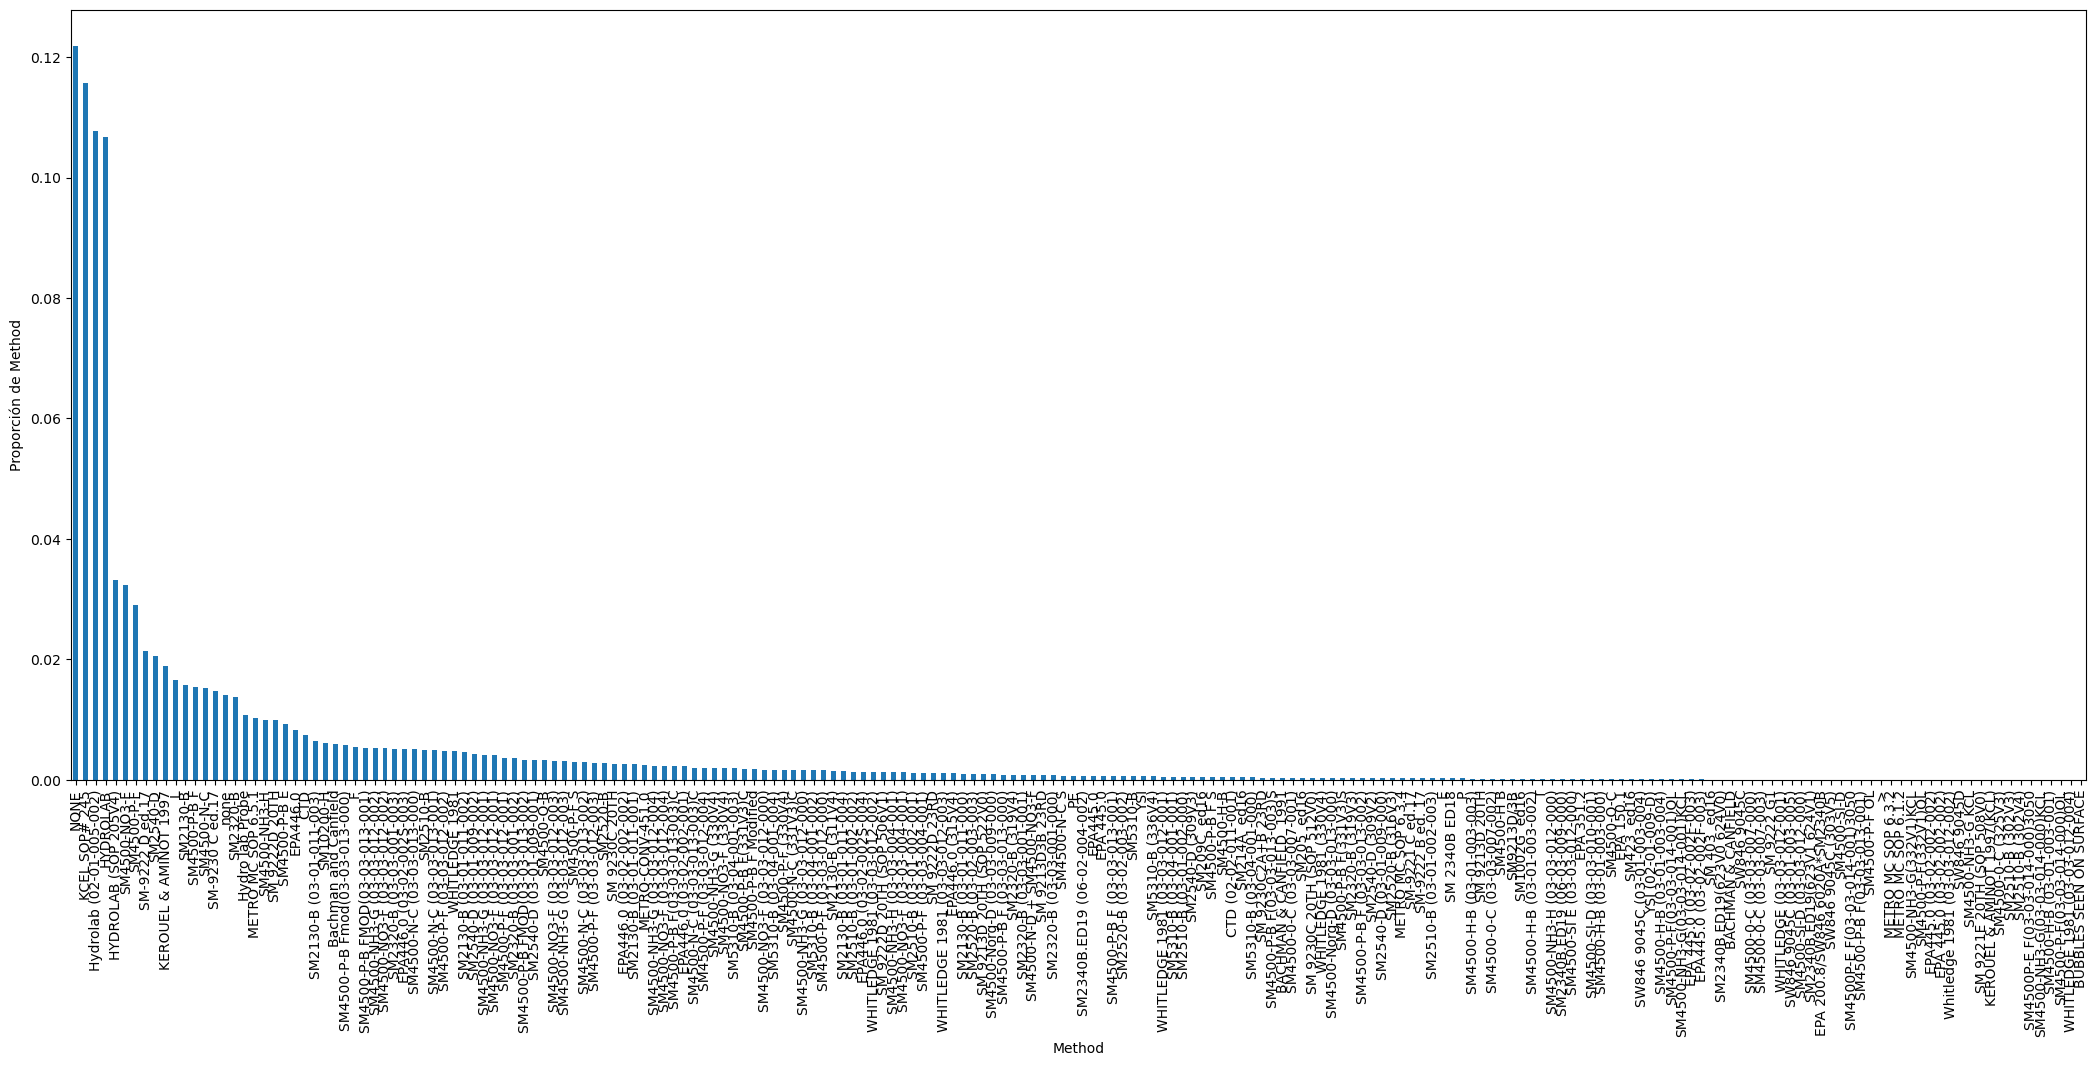

In [44]:
plt.figure(figsize=(26, 10))
dataPro['Method'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.xlabel("Method")
plt.ylabel("Proporción de Method")
plt.show()
 

    Como son demasiados valores diferentes, y debido a que NONE es la moda en la variable METHOD, imputaremos con este valor viendo que es lo considerable, para estandarizar la VARIABLE

In [45]:
dataPro['Method'].fillna('NONE', inplace=True)

Realizamos una valición para verificar la población **NULA** de las variables 

In [46]:
dataPro.isnull().mean()

Sample ID           0.0
Grab ID             0.0
Profile ID          0.0
Sample Number       0.0
Collect DateTime    0.0
Depth (m)           0.0
Site Type           0.0
Area                0.0
Locator             0.0
Site                0.0
Parameter           0.0
Value               0.0
Units               0.0
QualityId           0.0
Method              0.0
dtype: float64

    Adicionalmente y para identificar de manera visual, generamos un Gráfico de MAPA DE CALOR, para tener un mejor panorama del contenido de las variables

<Axes: >

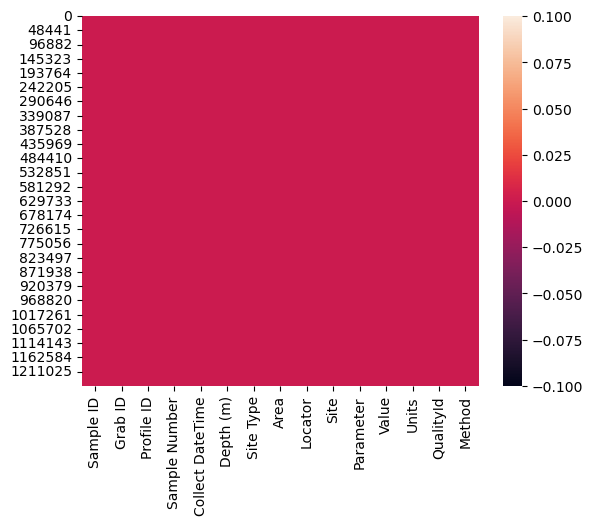

In [47]:
missing_val = dataPro.isna()
missing_val_sum = missing_val.sum()
missing_val_sum

sns.heatmap(missing_val)

#### 4.2. Codificación de Variables Categóricas

    Luego de la depuracion e imputacion de las variables volvemos a definir cuales son las variables categoricas que quedaron de nuestro dataset

In [48]:
categoricas = [col for col in dataPro.columns if(dataPro[col].dtypes == 'object')]
categoricas

['Sample Number',
 'Collect DateTime',
 'Site Type',
 'Area',
 'Locator',
 'Site',
 'Parameter',
 'Units',
 'Method']

    Utilizaremos una codificación por frecuencia para las variable categóricas

In [49]:
for col in categoricas:
       values_for_encode = dataPro[col].value_counts().to_dict()
       dataPro[col] = dataPro[col].map(values_for_encode)

    Verificamos que todas las variables sean del tipo NUMÉRICA

In [50]:
dataPro.dtypes

Sample ID             int64
Grab ID             float64
Profile ID            int64
Sample Number         int64
Collect DateTime      int64
Depth (m)           float64
Site Type             int64
Area                  int64
Locator               int64
Site                  int64
Parameter             int64
Value               float64
Units                 int64
QualityId             int64
Method                int64
dtype: object

#### 4.3. Transformación de Variables:

In [51]:
dataPro.describe()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units,QualityId,Method
count,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06
mean,8.072059e+04,8.847375e+04,4.265437e+04,1.037503e+01,4.341711e+01,9.225861e+00,6.099437e+05,1.958953e+05,3.883834e+04,3.904985e+04,6.638731e+04,1.534329e+02,2.396302e+05,1.948271e+00,1.211876e+05
std,5.168191e+04,3.880204e+04,1.659986e+04,4.402274e+00,8.114487e+01,1.202562e+01,2.035791e+05,1.697155e+05,3.960681e+04,3.960268e+04,3.435475e+04,5.929658e+03,1.949214e+05,5.608278e-01,1.246444e+05
min,5.310000e+02,7.000000e+02,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.330000e+02,1.430000e+02,1.500000e+01,1.500000e+01,1.400000e+01,-1.600000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.191200e+04,6.840500e+04,3.647275e+04,6.000000e+00,1.100000e+01,1.100000e+00,4.330260e+05,1.515200e+04,6.857000e+03,6.884000e+03,4.570200e+04,1.200000e+00,7.653500e+04,2.000000e+00,1.476000e+04
50%,7.482800e+04,8.847375e+04,4.273100e+04,1.100000e+01,1.400000e+01,6.000000e+00,7.602620e+05,2.207820e+05,1.541000e+04,1.541000e+04,6.569300e+04,8.300000e+00,1.192630e+05,2.000000e+00,1.140640e+05
75%,1.257890e+05,1.050580e+05,5.025800e+04,1.400000e+01,2.100000e+01,1.010000e+01,7.602620e+05,4.150610e+05,6.508700e+04,6.508700e+04,9.454900e+04,8.000000e+01,4.838420e+05,2.000000e+00,3.206530e+05
max,1.860330e+05,1.860330e+05,7.911900e+04,2.300000e+01,6.750000e+02,2.010000e+02,7.602620e+05,4.150610e+05,1.148270e+05,1.148270e+05,1.266330e+05,1.000000e+06,4.838420e+05,9.000000e+00,3.206530e+05


In [52]:
def plot_sensity_qq(dataPro, variable):

       plt.figure(figsize=(8, 3))

       plt.subplot(121)
       dataPro[variable].hist(bins=30)
       plt.title(variable)

       plt.subplot(122)
       stats.probplot(dataPro[variable], dist="norm", plot=plt)
       
       plt.show()

* Se debe hacer por que los modelos asumen que el comportamiento de las variables tiene una distribuación normal. Se debe buscar la mejor (aproximadamente normal).
 * Considerar el dominio de la funcion de transformacion a aplicar
    * Logarítmica o exponencial.
    * polinomial.
    * inversa/reciproca.
    * Box-Cox
    * Yeo-Johnson

###  4.3.1 Analisis de la variable Sample ID 

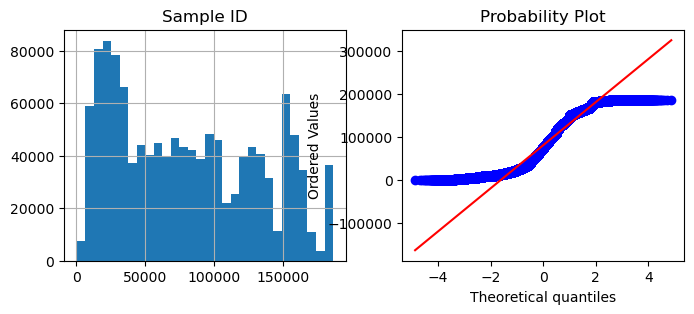

In [53]:
plot_sensity_qq(dataPro, 'Sample ID')

In [54]:
dataPro['Sample ID'].describe()

count    1.259444e+06
mean     8.072059e+04
std      5.168191e+04
min      5.310000e+02
25%      3.191200e+04
50%      7.482800e+04
75%      1.257890e+05
max      1.860330e+05
Name: Sample ID, dtype: float64

In [55]:
# Se crea una copia del DF para solo visualizar la transformacion
dataPro_Tra = dataPro.copy()

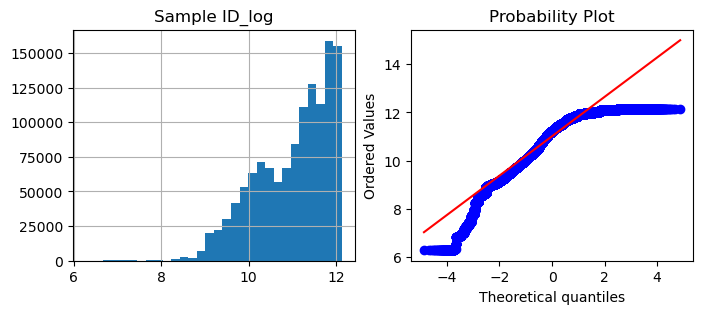

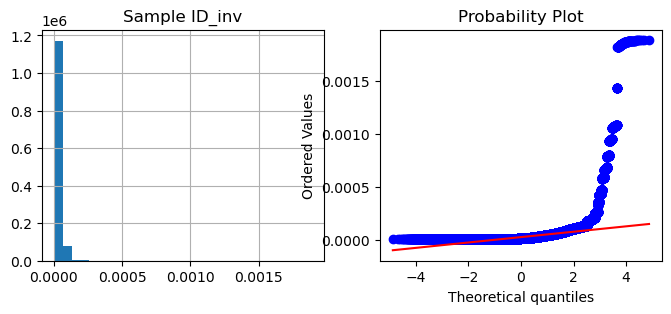

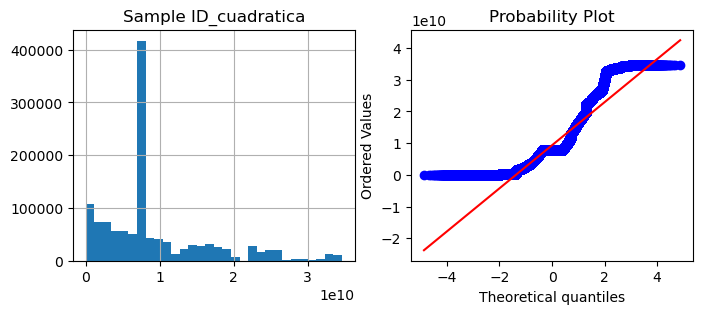

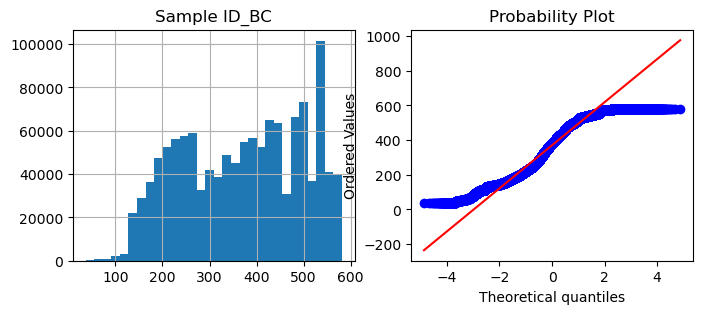

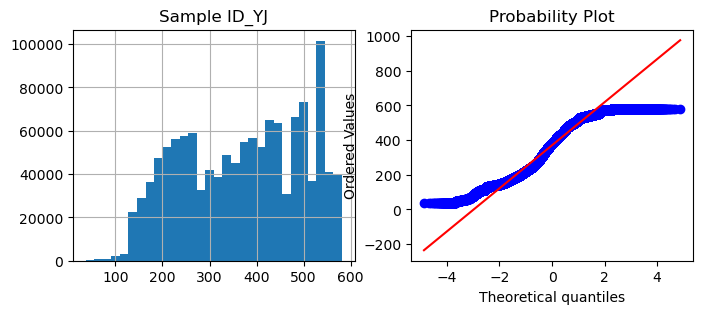

In [57]:
dataPro_Tra['Sample ID_log'] = np.log(dataPro_Tra['Sample ID'])
plot_sensity_qq(dataPro_Tra, 'Sample ID_log')

dataPro_Tra['Sample ID_inv'] = 1/dataPro_Tra['Sample ID']
plot_sensity_qq(dataPro_Tra, 'Sample ID_inv')

dataPro_Tra['Sample ID_cuadratica'] = dataPro_Tra['Grab ID']**2
plot_sensity_qq(dataPro_Tra, 'Sample ID_cuadratica')

dataPro_Tra['Sample ID_BC'], lmbd  = stats.boxcox(dataPro_Tra['Sample ID'])
plot_sensity_qq(dataPro_Tra, 'Sample ID_BC')

dataPro_Tra['Sample ID_YJ'], lmbd  = stats.yeojohnson(dataPro_Tra['Sample ID'])
plot_sensity_qq(dataPro_Tra, 'Sample ID_YJ')

Luego del analisis se realizara la transformacion con Box-Cox, se hara al final

### Analisis de la variable Grab ID

In [58]:
dataPro["Grab ID"].describe()

count    1.259444e+06
mean     8.847375e+04
std      3.880204e+04
min      7.000000e+02
25%      6.840500e+04
50%      8.847375e+04
75%      1.050580e+05
max      1.860330e+05
Name: Grab ID, dtype: float64

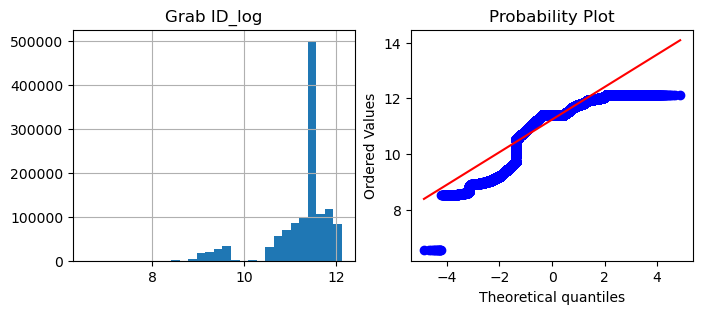

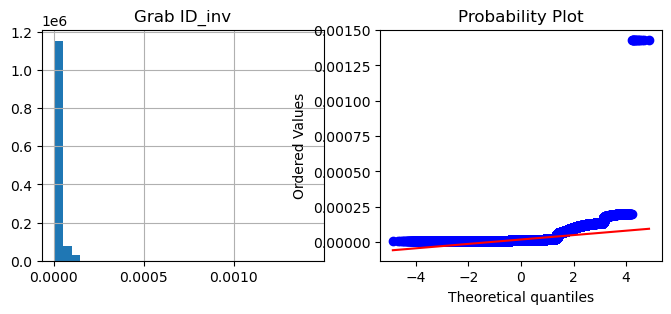

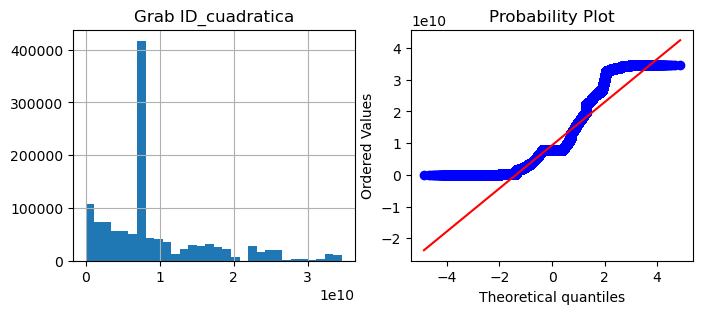

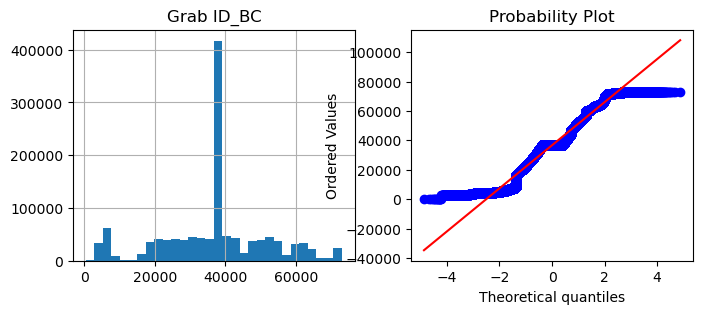

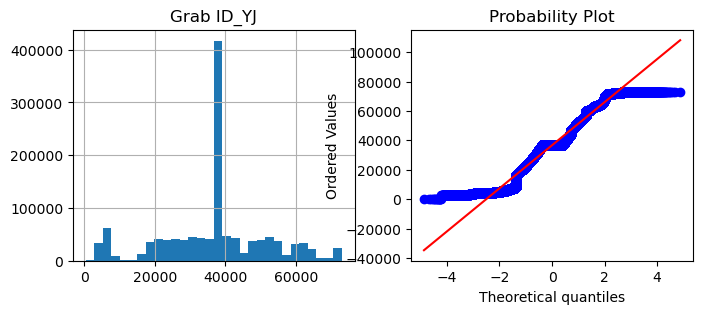

In [59]:
dataPro_Tra['Grab ID_log'] = np.log(dataPro_Tra['Grab ID'])
plot_sensity_qq(dataPro_Tra, 'Grab ID_log')

dataPro_Tra['Grab ID_inv'] = 1/dataPro_Tra['Grab ID']
plot_sensity_qq(dataPro_Tra, 'Grab ID_inv')

dataPro_Tra['Grab ID_cuadratica'] = dataPro_Tra['Grab ID']**2
plot_sensity_qq(dataPro_Tra, 'Grab ID_cuadratica')

dataPro_Tra['Grab ID_BC'], lmbd  = stats.boxcox(dataPro_Tra['Grab ID'])
plot_sensity_qq(dataPro_Tra, 'Grab ID_BC')

dataPro_Tra['Grab ID_YJ'], lmbd  = stats.yeojohnson(dataPro_Tra['Grab ID'])
plot_sensity_qq(dataPro_Tra, 'Grab ID_YJ')

Luego del analisis se realizara la transformacion con Box-Cox, se hara al final

### Analisis de la variable Profile ID

In [60]:
dataPro["Profile ID"].describe()

count    1.259444e+06
mean     4.265437e+04
std      1.659986e+04
min      4.000000e+00
25%      3.647275e+04
50%      4.273100e+04
75%      5.025800e+04
max      7.911900e+04
Name: Profile ID, dtype: float64

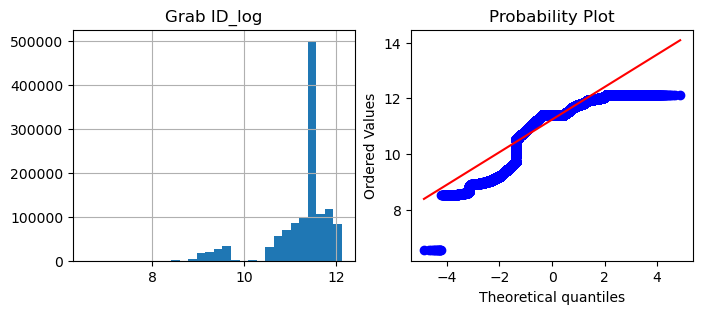

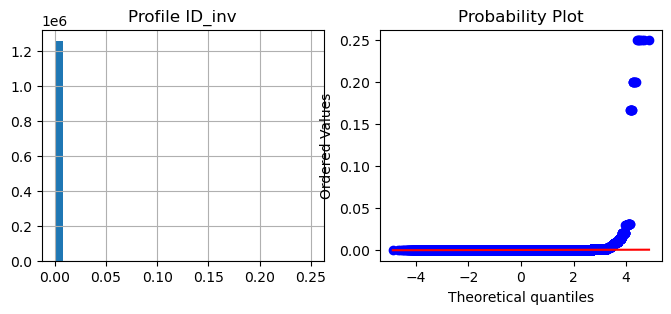

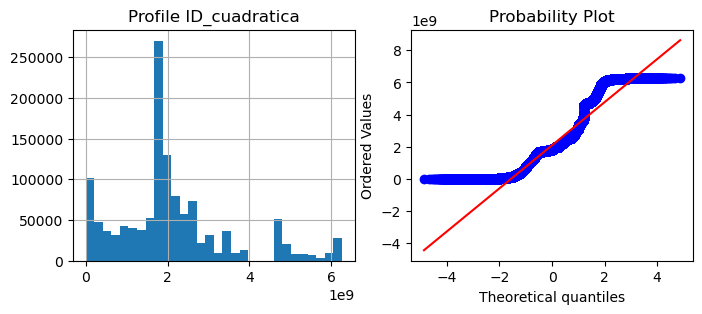

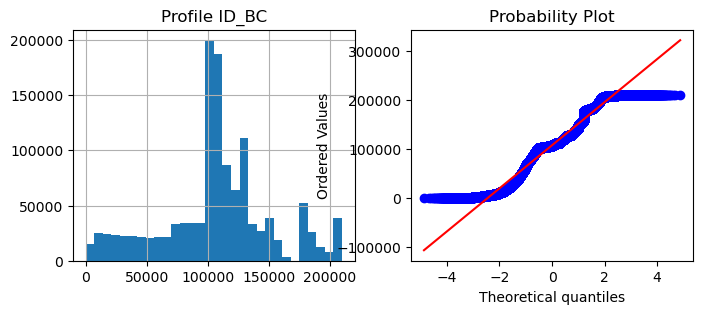

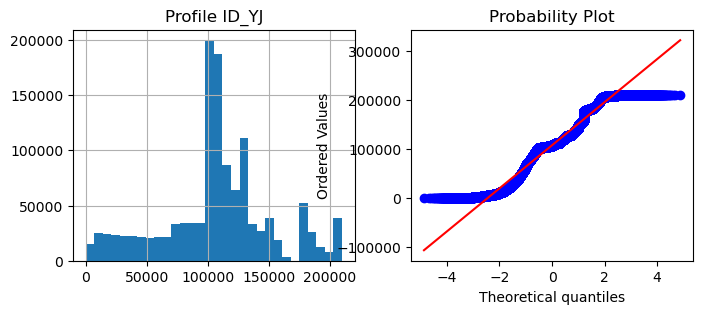

In [61]:
dataPro_Tra['Profile ID_log'] = np.log(dataPro_Tra['Profile ID'])
plot_sensity_qq(dataPro_Tra, 'Grab ID_log')

dataPro_Tra['Profile ID_inv'] = 1/dataPro_Tra['Profile ID']
plot_sensity_qq(dataPro_Tra, 'Profile ID_inv')

dataPro_Tra['Profile ID_cuadratica'] = dataPro_Tra['Profile ID']**2
plot_sensity_qq(dataPro_Tra, 'Profile ID_cuadratica')

dataPro_Tra['Profile ID_BC'], lmbd  = stats.boxcox(dataPro_Tra['Profile ID'])
plot_sensity_qq(dataPro_Tra, 'Profile ID_BC')

dataPro_Tra['Profile ID_YJ'], lmbd  = stats.yeojohnson(dataPro_Tra['Profile ID'])
plot_sensity_qq(dataPro_Tra, 'Profile ID_YJ')

Luego del analisis se realizara la transformacion con Box-Cox, se hara al final

### Analisis de la variable Sample Number

In [62]:
dataPro["Sample Number"].describe()

count    1.259444e+06
mean     1.037503e+01
std      4.402274e+00
min      1.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      2.300000e+01
Name: Sample Number, dtype: float64

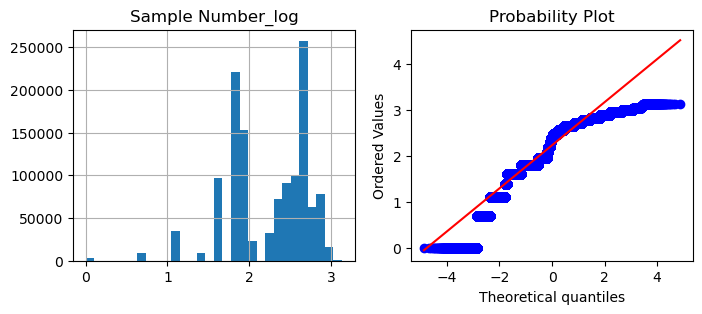

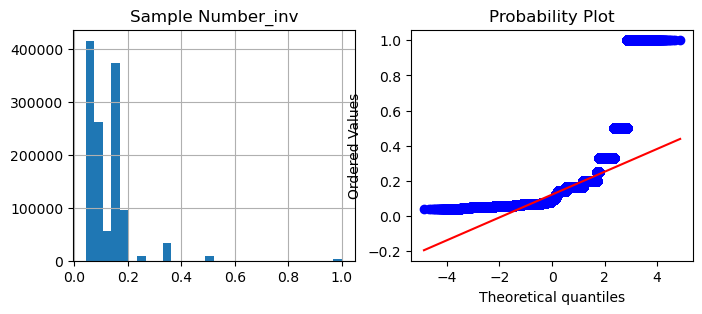

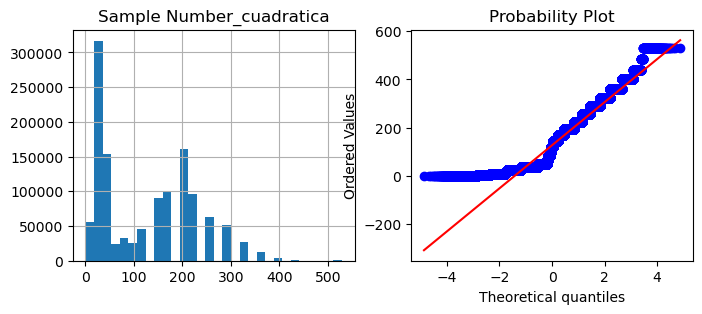

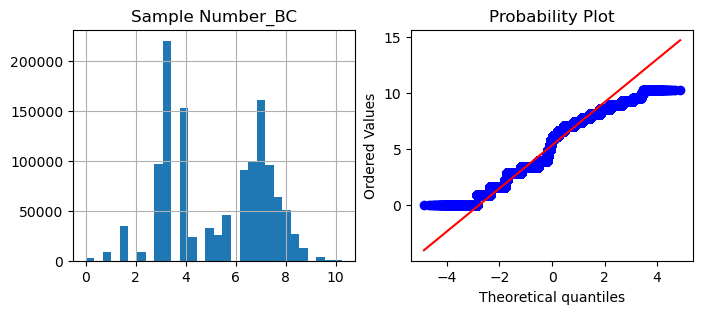

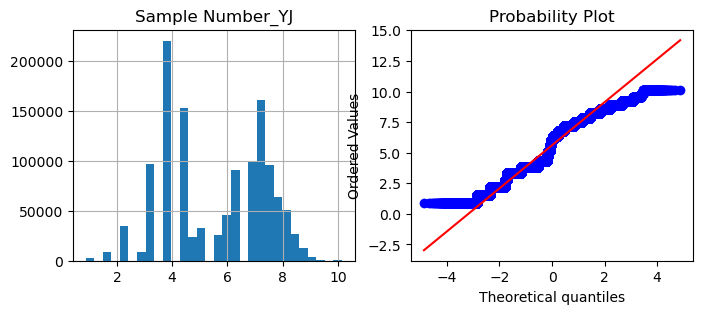

In [63]:
dataPro_Tra['Sample Number_log'] = np.log(dataPro_Tra['Sample Number'])
plot_sensity_qq(dataPro_Tra, 'Sample Number_log')

dataPro_Tra['Sample Number_inv'] = 1/dataPro_Tra['Sample Number']
plot_sensity_qq(dataPro_Tra, 'Sample Number_inv')

dataPro_Tra['Sample Number_cuadratica'] = dataPro_Tra['Sample Number']**2
plot_sensity_qq(dataPro_Tra, 'Sample Number_cuadratica')

dataPro_Tra['Sample Number_BC'], lmbd  = stats.boxcox(dataPro_Tra['Sample Number'])
plot_sensity_qq(dataPro_Tra, 'Sample Number_BC')

dataPro_Tra['Sample Number_YJ'], lmbd  = stats.yeojohnson(dataPro_Tra['Sample Number'])
plot_sensity_qq(dataPro_Tra, 'Sample Number_YJ')

Luego del analisis se realizara la transformacion con Box-Cox, se hara al final

### Analisis de la variable Collect DateTime

In [64]:
dataPro["Collect DateTime"].describe()

count    1.259444e+06
mean     4.341711e+01
std      8.114487e+01
min      1.000000e+00
25%      1.100000e+01
50%      1.400000e+01
75%      2.100000e+01
max      6.750000e+02
Name: Collect DateTime, dtype: float64

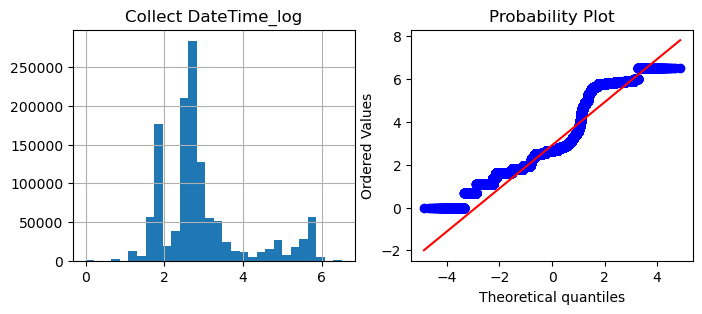

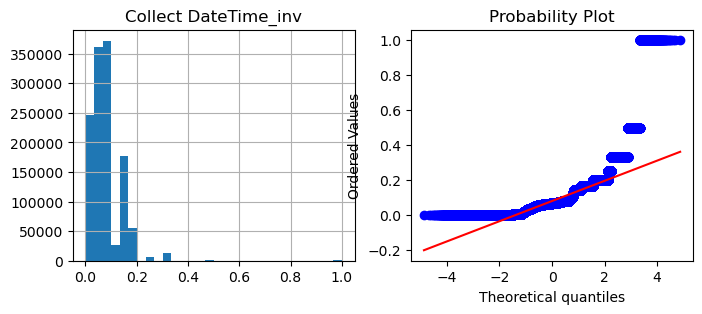

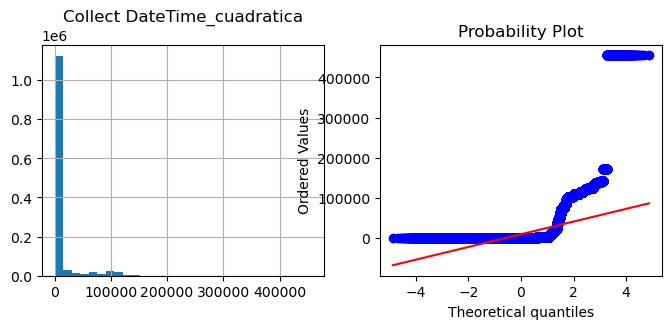

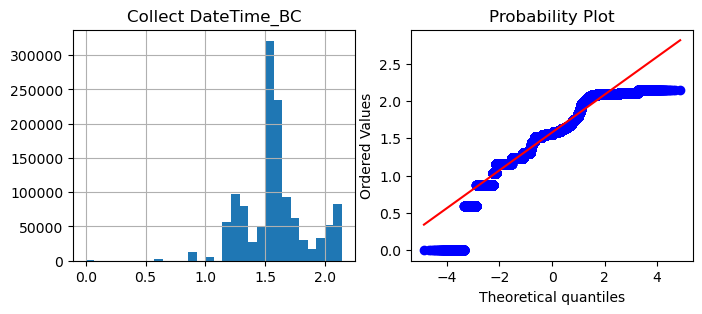

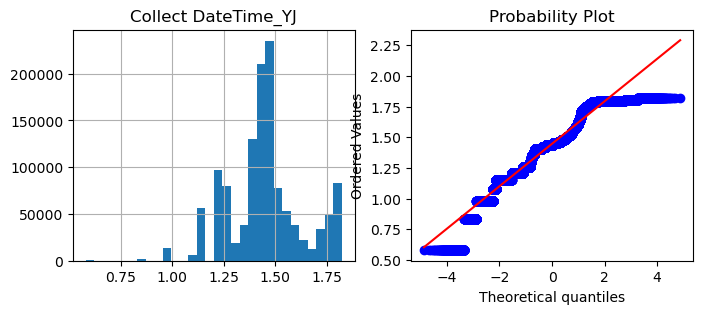

In [66]:
dataPro_Tra['Collect DateTime_log'] = np.log(dataPro_Tra['Collect DateTime'])
plot_sensity_qq(dataPro_Tra, 'Collect DateTime_log')

dataPro_Tra['Collect DateTime_inv'] = 1/dataPro_Tra['Collect DateTime']
plot_sensity_qq(dataPro_Tra, 'Collect DateTime_inv')

dataPro_Tra['Collect DateTime_cuadratica'] = dataPro_Tra['Collect DateTime']**2
plot_sensity_qq(dataPro_Tra, 'Collect DateTime_cuadratica')

dataPro_Tra['Collect DateTime_BC'], lmbd  = stats.boxcox(dataPro_Tra['Collect DateTime'])
plot_sensity_qq(dataPro_Tra, 'Collect DateTime_BC')

dataPro_Tra['Collect DateTime_YJ'], lmbd  = stats.yeojohnson(dataPro_Tra['Collect DateTime'])
plot_sensity_qq(dataPro_Tra, 'Collect DateTime_YJ')

Luego del analisis se realizara la transformacion con Box-Cox, se hara al final

### Analisis de la variable Depth (m)

In [67]:
dataPro["Depth (m)"].describe()

count    1.259444e+06
mean     9.225861e+00
std      1.202562e+01
min      0.000000e+00
25%      1.100000e+00
50%      6.000000e+00
75%      1.010000e+01
max      2.010000e+02
Name: Depth (m), dtype: float64

como el valor minimo es 0, se le suma un 1 a toda la variable

In [68]:
dataPro["Depth (m)"] = dataPro["Depth (m)"]+1

In [69]:
for col in dataPro:    
    print(col+": "+str(dataPro[col].min()))

Sample ID: 531
Grab ID: 700.0
Profile ID: 4
Sample Number: 1
Collect DateTime: 1
Depth (m): 1.0
Site Type: 133
Area: 143
Locator: 15
Site: 15
Parameter: 14
Value: -1.6
Units: 1
QualityId: 0
Method: 1


Cuando se realizo el analisis de minimos, habian valores con CERO, por lo que se le sumo un 1 para poder realizar la transformacion Box-Cox y en Value se sumo 2 para que fuera superior a CERO

In [70]:
 
dataPro["Value"] = dataPro["Value"]+2

dataPro.describe()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units,QualityId,Method
count,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06
mean,8.072059e+04,8.847375e+04,4.265437e+04,1.037503e+01,4.341711e+01,1.022586e+01,6.099437e+05,1.958953e+05,3.883834e+04,3.904985e+04,6.638731e+04,1.554329e+02,2.396302e+05,1.948271e+00,1.211876e+05
std,5.168191e+04,3.880204e+04,1.659986e+04,4.402274e+00,8.114487e+01,1.202562e+01,2.035791e+05,1.697155e+05,3.960681e+04,3.960268e+04,3.435475e+04,5.929658e+03,1.949214e+05,5.608278e-01,1.246444e+05
min,5.310000e+02,7.000000e+02,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.330000e+02,1.430000e+02,1.500000e+01,1.500000e+01,1.400000e+01,4.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.191200e+04,6.840500e+04,3.647275e+04,6.000000e+00,1.100000e+01,2.100000e+00,4.330260e+05,1.515200e+04,6.857000e+03,6.884000e+03,4.570200e+04,3.200000e+00,7.653500e+04,2.000000e+00,1.476000e+04
50%,7.482800e+04,8.847375e+04,4.273100e+04,1.100000e+01,1.400000e+01,7.000000e+00,7.602620e+05,2.207820e+05,1.541000e+04,1.541000e+04,6.569300e+04,1.030000e+01,1.192630e+05,2.000000e+00,1.140640e+05
75%,1.257890e+05,1.050580e+05,5.025800e+04,1.400000e+01,2.100000e+01,1.110000e+01,7.602620e+05,4.150610e+05,6.508700e+04,6.508700e+04,9.454900e+04,8.200000e+01,4.838420e+05,2.000000e+00,3.206530e+05
max,1.860330e+05,1.860330e+05,7.911900e+04,2.300000e+01,6.750000e+02,2.020000e+02,7.602620e+05,4.150610e+05,1.148270e+05,1.148270e+05,1.266330e+05,1.000002e+06,4.838420e+05,9.000000e+00,3.206530e+05


In [71]:
dataPro["Value"].min()

0.3999999999999999

In [72]:
for col in dataPro:
    if dataPro[col].min()==0:
       dataPro[col] = dataPro[col]+1

In [73]:
for col in dataPro:    
    print(col+": "+str(dataPro[col].min()))

Sample ID: 531
Grab ID: 700.0
Profile ID: 4
Sample Number: 1
Collect DateTime: 1
Depth (m): 1.0
Site Type: 133
Area: 143
Locator: 15
Site: 15
Parameter: 14
Value: 0.3999999999999999
Units: 1
QualityId: 1
Method: 1


Se verifican que no hayan solo un valor unico en cada variable

In [74]:
for col in dataPro:    
    print(col+": "+str(len(dataPro[col].unique())))

Sample ID: 154694
Grab ID: 112986
Profile ID: 54951
Sample Number: 23
Collect DateTime: 289
Depth (m): 646
Site Type: 6
Area: 62
Locator: 171
Site: 169
Parameter: 45
Value: 6013
Units: 23
QualityId: 8
Method: 175


Viendo que las variables son consistentes con Box-Cox ser realizaran a las demas variables la transformacion, verificando que se pueda cumplir con las condiciones para su transformacion

In [75]:
for col in dataPro:
    dataPro[col] , lmbd  = stats.boxcox(dataPro[col])  

Transformacion final con Box-Cox

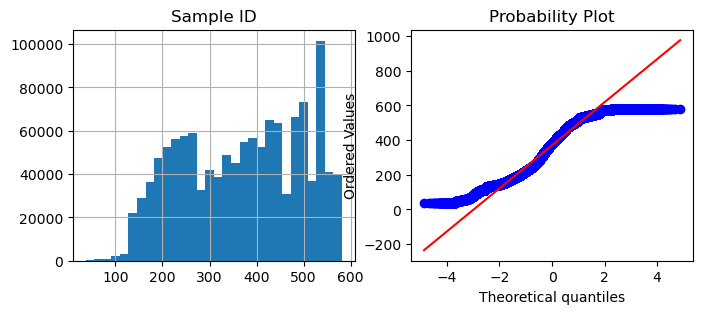

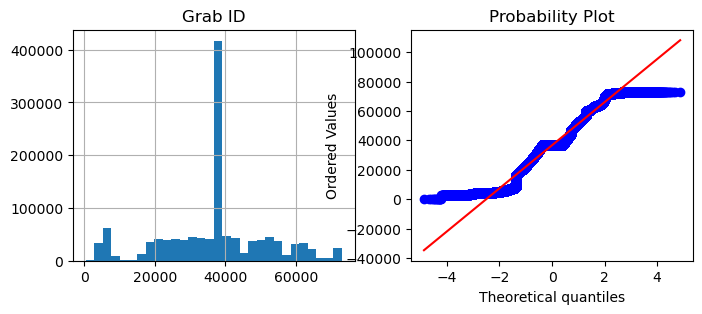

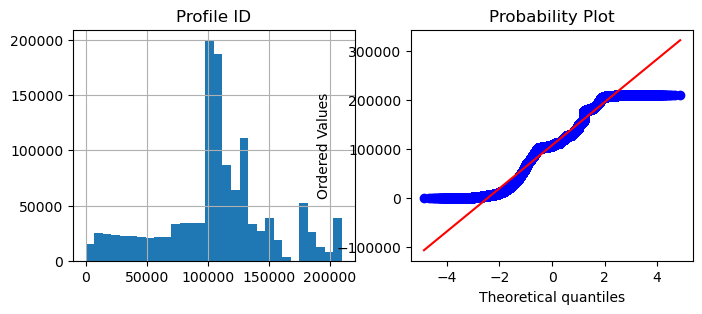

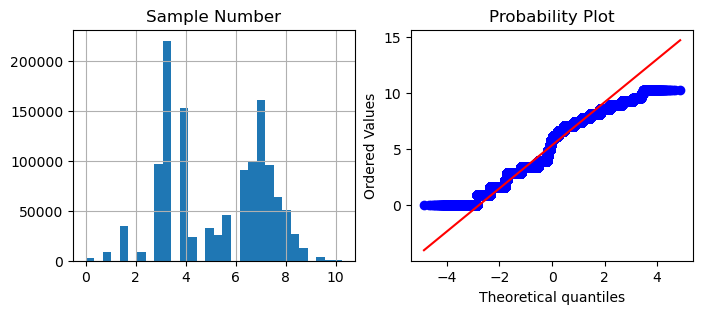

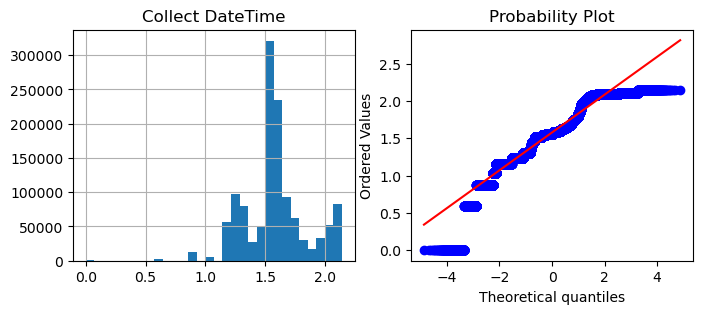

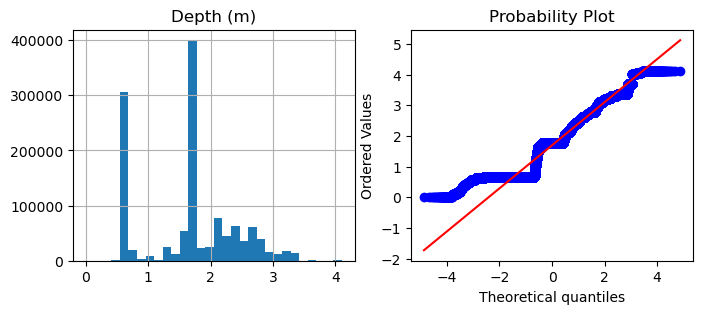

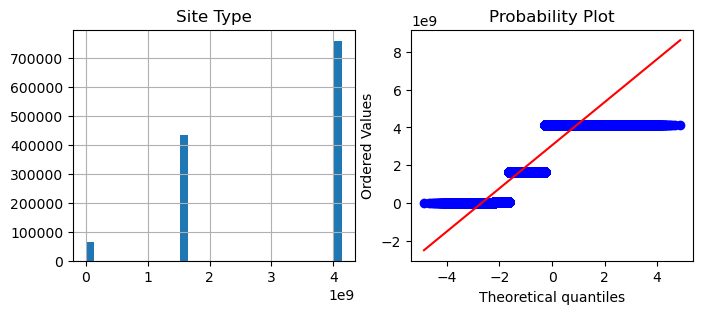

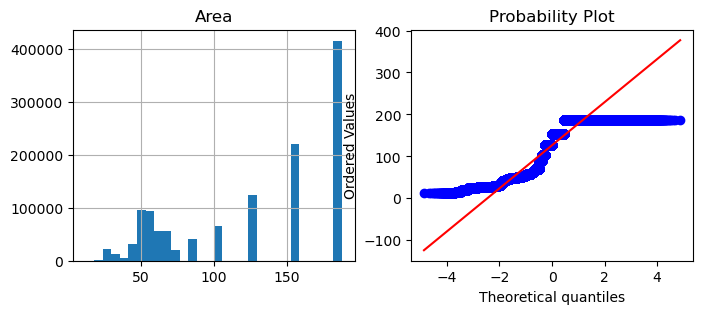

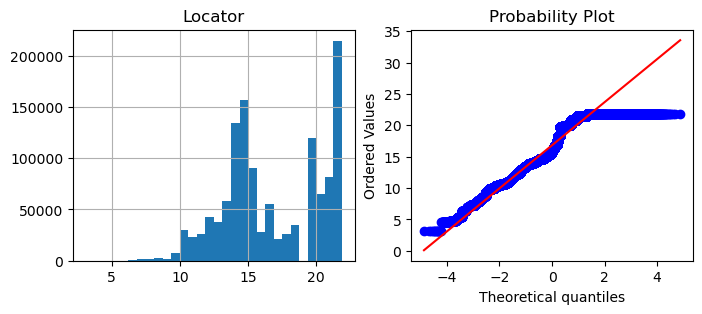

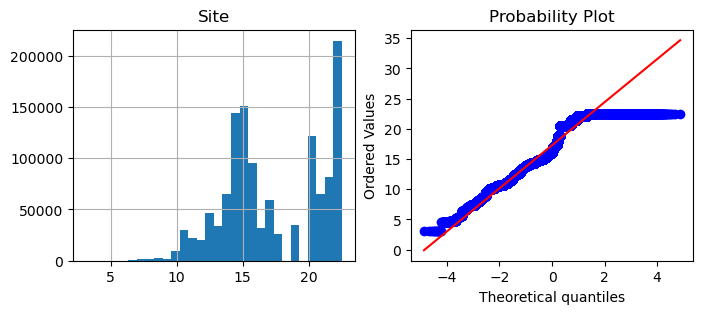

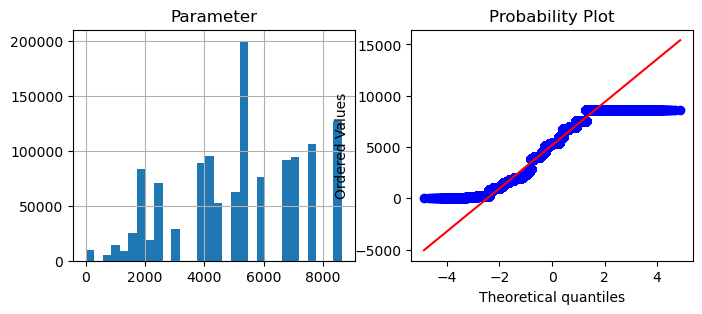

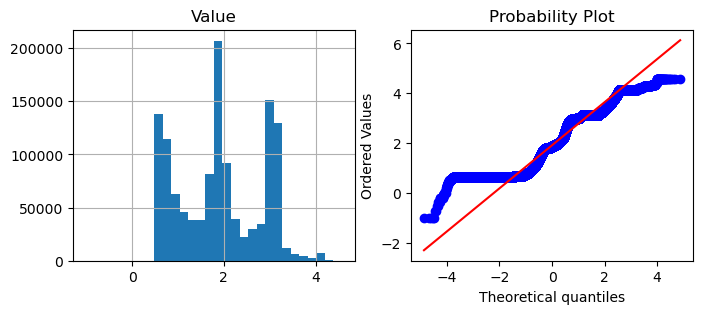

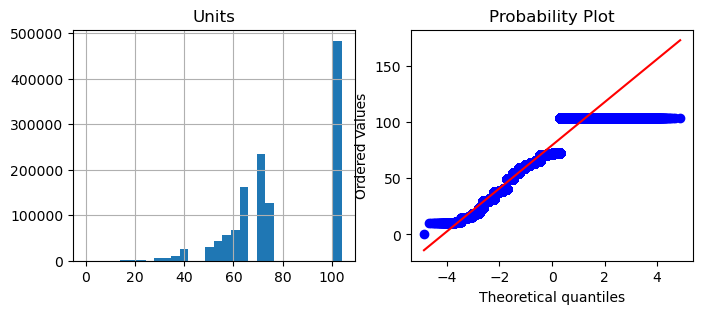

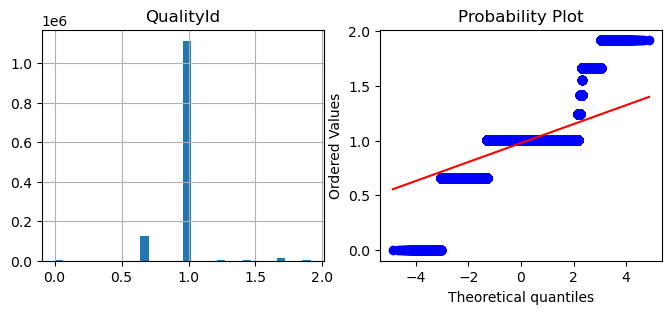

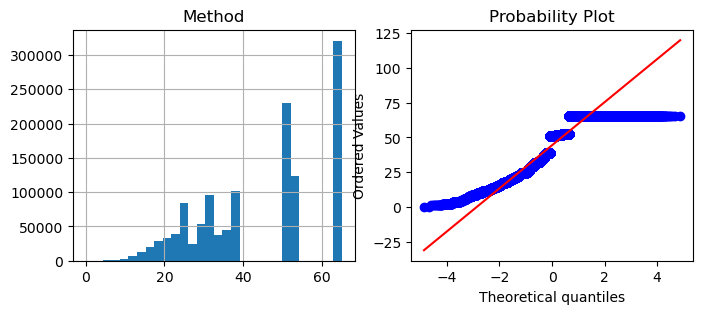

In [76]:
for col in dataPro:     
    plot_sensity_qq(dataPro,col)

#### 4.4. Tratamiento de Outliers (solo variables continuas):

    Se vuelven a calcular las variables continuas para el tratamiento de los Outliers

In [77]:
continuas = [col for col in dataPro.columns if((dataPro[col].dtypes in ['int64', 'float64']) and len(dataPro[col].unique()) > 30)]
continuas

['Sample ID',
 'Grab ID',
 'Profile ID',
 'Collect DateTime',
 'Depth (m)',
 'Area',
 'Locator',
 'Site',
 'Parameter',
 'Value',
 'Method']

In [78]:
dataPro_CAPP = dataPro.copy()

##### 4.4.1 Caping para las variables continuas

    Identificamos y tratamos los valores extremos de las variables continuas

Sample ID


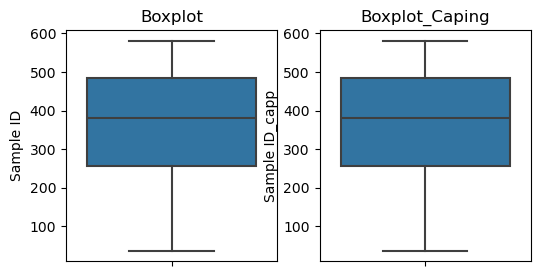

Grab ID


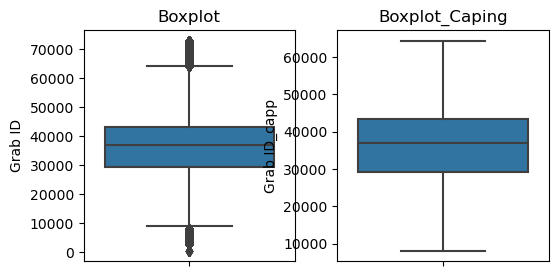

Profile ID


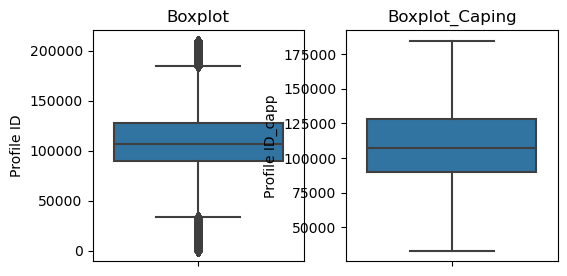

Collect DateTime


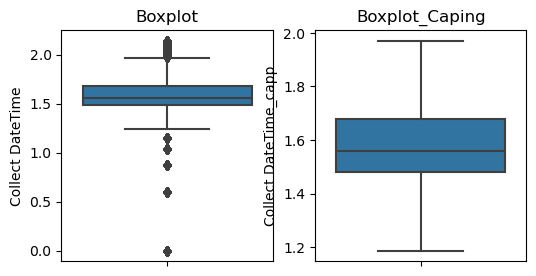

Depth (m)


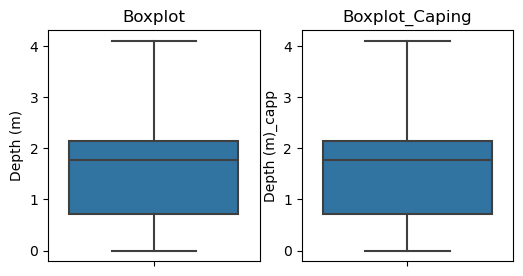

Area


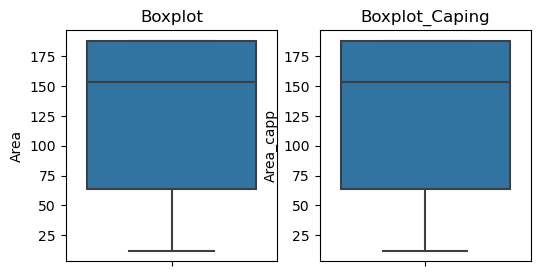

Locator


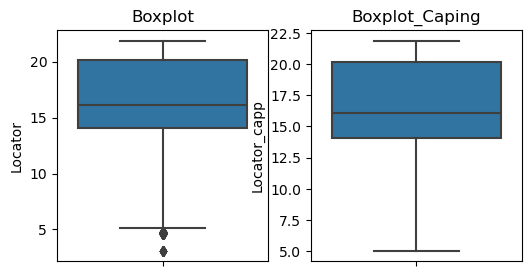

Site


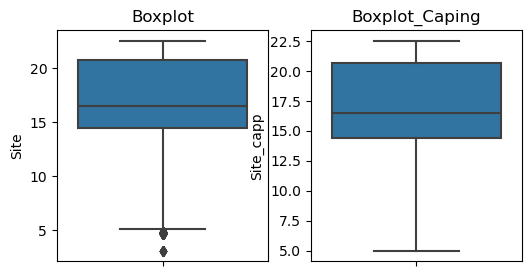

Parameter


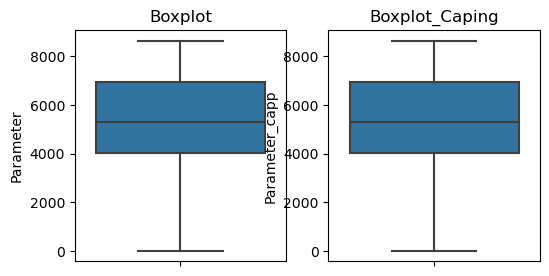

Value


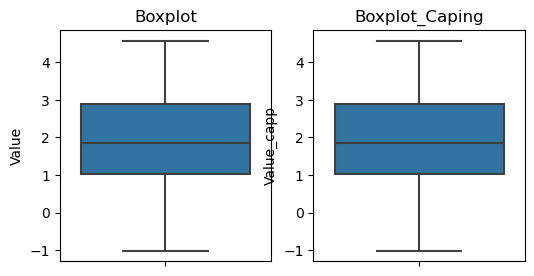

Method


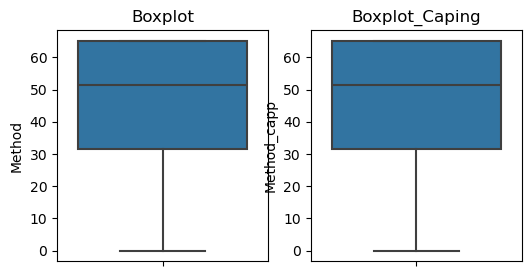

In [79]:
for col in continuas:
       IQR = dataPro_CAPP[col].quantile(0.75) - dataPro_CAPP[col].quantile(0.25)
       LI = dataPro_CAPP[col].quantile(0.25) - 1.5*IQR
       LS = dataPro_CAPP[col].quantile(0.75) + 1.5*IQR

       dataPro_CAPP[col+'_capp'] = np.where(dataPro_CAPP[col] > LS, LS, np.where(dataPro_CAPP[col] < LI, LI, dataPro_CAPP[col]))

       print(col)

       plt.figure(figsize=(6, 3))
       plt.subplot(121)
       plt.title("Boxplot")
       sns.boxplot(y=dataPro_CAPP[col])

       plt.subplot(122)
       plt.title("Boxplot_Caping")
       sns.boxplot(y=dataPro_CAPP[col + "_capp"])

       plt.show()

    Realizamos en un tratamiento de los outlier por medio de Detacción basada en el IQR, usamos 1.5*IQR como factor 

Sample ID


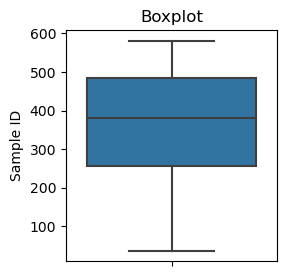

Grab ID


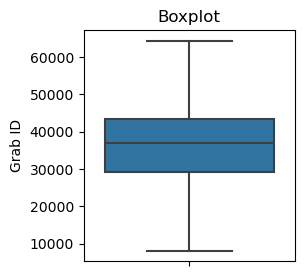

Profile ID


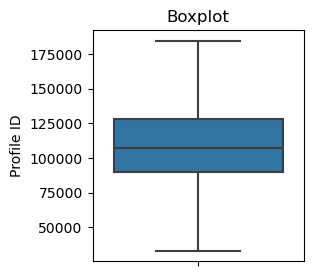

Collect DateTime


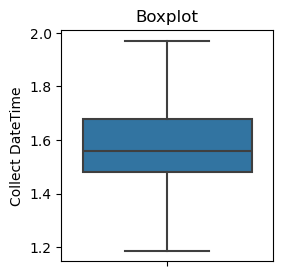

Depth (m)


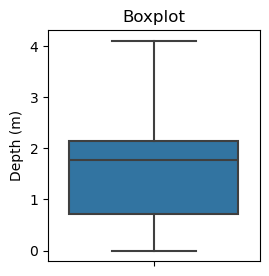

Area


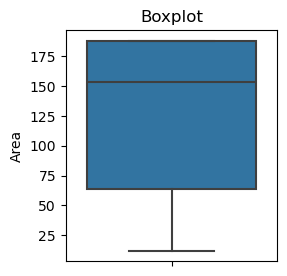

Locator


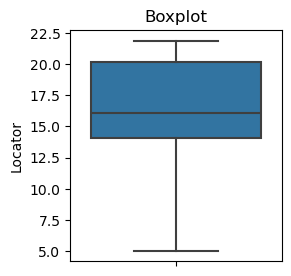

Site


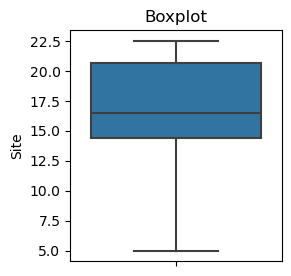

Parameter


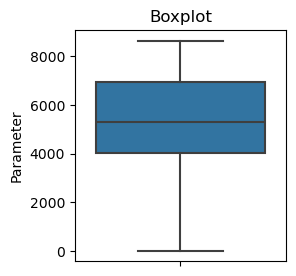

Value


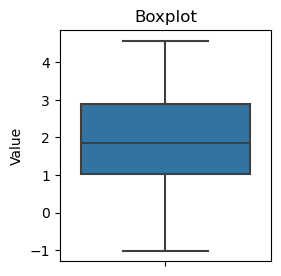

Method


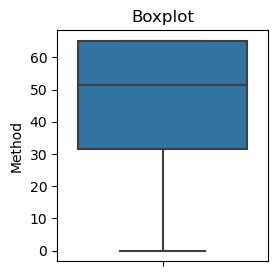

In [80]:
for col in continuas:
       IQR = dataPro[col].quantile(0.75) - dataPro_CAPP[col].quantile(0.25)
       LI = dataPro[col].quantile(0.25) - 1.5*IQR
       LS = dataPro[col].quantile(0.75) + 1.5*IQR

       dataPro[col] = np.where(dataPro[col] > LS, LS, np.where(dataPro[col] < LI, LI, dataPro[col]))

       print(col)

       plt.figure(figsize=(6, 3))
       plt.subplot(121)
       plt.title("Boxplot")
       sns.boxplot(y=dataPro[col]) 

       plt.show()

#### 4.5. Feature Scaling

##### 4.5.1 Normalización de la información

    Se busca normalizar los valores de cada columna del Dataset entre 0 y 1, para facilitar la interpretación de los resultados y mejoras en la precisión del modelo

In [81]:
for col in dataPro:
    min_LF = dataPro[col].min()
    max_LF = dataPro[col].max()
    range_LF = (max_LF-min_LF)

    dataPro[col] = (dataPro[col]-min_LF)/(range_LF)

    Verificación de los valores del Dataset

In [82]:
dataPro.describe()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units,QualityId,Method
count,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06,1.259444e+06
mean,6.128237e-01,5.073431e-01,4.951727e-01,5.204727e-01,4.935518e-01,4.138786e-01,7.381276e-01,6.515980e-01,7.002111e-01,7.012885e-01,5.985353e-01,5.229684e-01,7.644573e-01,5.102419e-01,6.820658e-01
std,2.337331e-01,2.536859e-01,2.674961e-01,1.939659e-01,2.865563e-01,1.795046e-01,3.333060e-01,3.162481e-01,2.126099e-01,2.120556e-01,2.481341e-01,1.610417e-01,2.015154e-01,7.002123e-02,2.494865e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.035358e-01,3.750000e-01,3.750000e-01,3.305092e-01,3.750000e-01,1.740655e-01,3.899129e-01,2.935061e-01,5.377554e-01,5.373473e-01,4.666148e-01,3.660139e-01,6.134451e-01,5.247470e-01,4.844790e-01
50%,6.324100e-01,5.129870e-01,4.875563e-01,5.623139e-01,4.766455e-01,4.301238e-01,1.000000e+00,8.027623e-01,6.576761e-01,6.564260e-01,6.121660e-01,5.124994e-01,6.906967e-01,5.247470e-01,7.881836e-01
75%,8.230236e-01,6.250000e-01,6.250000e-01,6.830848e-01,6.250000e-01,5.202007e-01,1.000000e+00,1.000000e+00,8.962590e-01,8.955789e-01,8.037773e-01,6.996016e-01,1.000000e+00,5.247470e-01,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


    Ajuste de decimales en cada variable, para una mejor manipulación e interpretación del Dataset

In [83]:
for col in dataPro:
    dataPro[col]=round(dataPro[col],4)

dataPro.head()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units,QualityId,Method
0,0.2770,0.0000,0.0000,0.6831,1.0000,0.1630,0.3899,0.2935,0.5292,0.5282,0.6122,0.3018,1.0000,0.5247,0.4868
1,0.1925,0.0000,0.3967,0.6037,1.0000,0.1630,0.3899,0.2545,0.5136,0.5127,0.6202,0.3431,1.0000,0.5247,1.0000
2,0.8613,0.8416,0.7009,0.3305,0.0664,0.1630,1.0000,0.6550,0.6867,0.6854,1.0000,0.5855,0.7018,0.5247,0.7882
3,0.8425,0.8027,0.6314,0.6037,0.4129,0.1630,1.0000,0.6550,0.7058,0.7046,0.5878,0.2970,1.0000,0.5247,0.5795
4,0.6641,0.4710,0.5087,0.3305,0.0664,0.3698,1.0000,1.0000,0.6988,0.6975,1.0000,0.5191,0.7018,0.5247,0.7882


# 5. Archivo de Salida

In [84]:
dataPro.to_csv('SRC/DATA/water-quality_FE.csv', index=False)